In [ ]:
## Bios625 Final Project

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'retina'

In [4]:
# Colors
colors = ['lightcoral',
          'brown',
          'lightseagreen',
          'maroon',
          'deeppink',
          'darkorange',
          'royalblue',
          'darkviolet',
          'gold',
          'crimson',
          'lightsteelblue',
          'salmon',
          'mediumseagreen',
          'olivedrab',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'violet',
          'cyan']

In [6]:
data = pd.read_csv("C:/Users/zyq11/Desktop/cancer_patient_data_sets.csv", index_col = 'index')
data.drop("Patient Id", axis=1, inplace=True)
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)

In [8]:
plot_save="C:/Users/zyq11/Desktop/Bios 625"

In [10]:
# mapping Level to 0,1,2
mapping = {"Low": 0,"Medium": 1,"High": 2}
data['Level'] = data['Level'].replace(mapping)
print(data)

       Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
995     44       1              6            7             7   
996     37       2              6            8             7   
997     25       2              4            5             6   
998     18       2              6            8             7   
999     47       1              6            5             6   

       OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  \
index                                                             
0                         4      

C:\Users\zyq11\AppData\Local\Temp\ipykernel_36364\874864364.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Level'] = data['Level'].replace(mapping)


In [94]:
# Data Visualization
n_cols = 6  # number of subplots each row
n_rows = int(np.ceil(len(data.columns) / n_cols))  

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, n_rows * 4))
ax = ax.flatten()  

# use for loop to show subplots
for i, column in enumerate(data.columns):
    if data[column].dtype in ['int64', 'float64']: 
        mean = np.mean(data[column])
        std = np.std(data[column])

        # scatter plot and threshold line
        ax[i].scatter(range(len(data[column])), data[column], label=f'{column} Data Points')
        ax[i].axhline(mean + 3 * std, color='r', linestyle='--', label='Upper Threshold (Z=3)')
        ax[i].axhline(mean - 3 * std, color='r', linestyle='--', label='Lower Threshold (Z=-3)')
        ax[i].legend()
        ax[i].set_title(f"Outlier Detection for {column}")
        ax[i].set_xlabel("Index")
        ax[i].set_ylabel(column)

# Hide redundant subplots
if len(data.columns) < len(ax):
    for j in range(len(data.columns), len(ax)):
        ax[j].set_visible(False)

plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=2)
save_path = os.path.join(plot_save, "Combined_OutlierDetection.png")

# save the whole fig
plt.savefig(save_path)
plt.show()
exit()

In [96]:
# Data Visualization

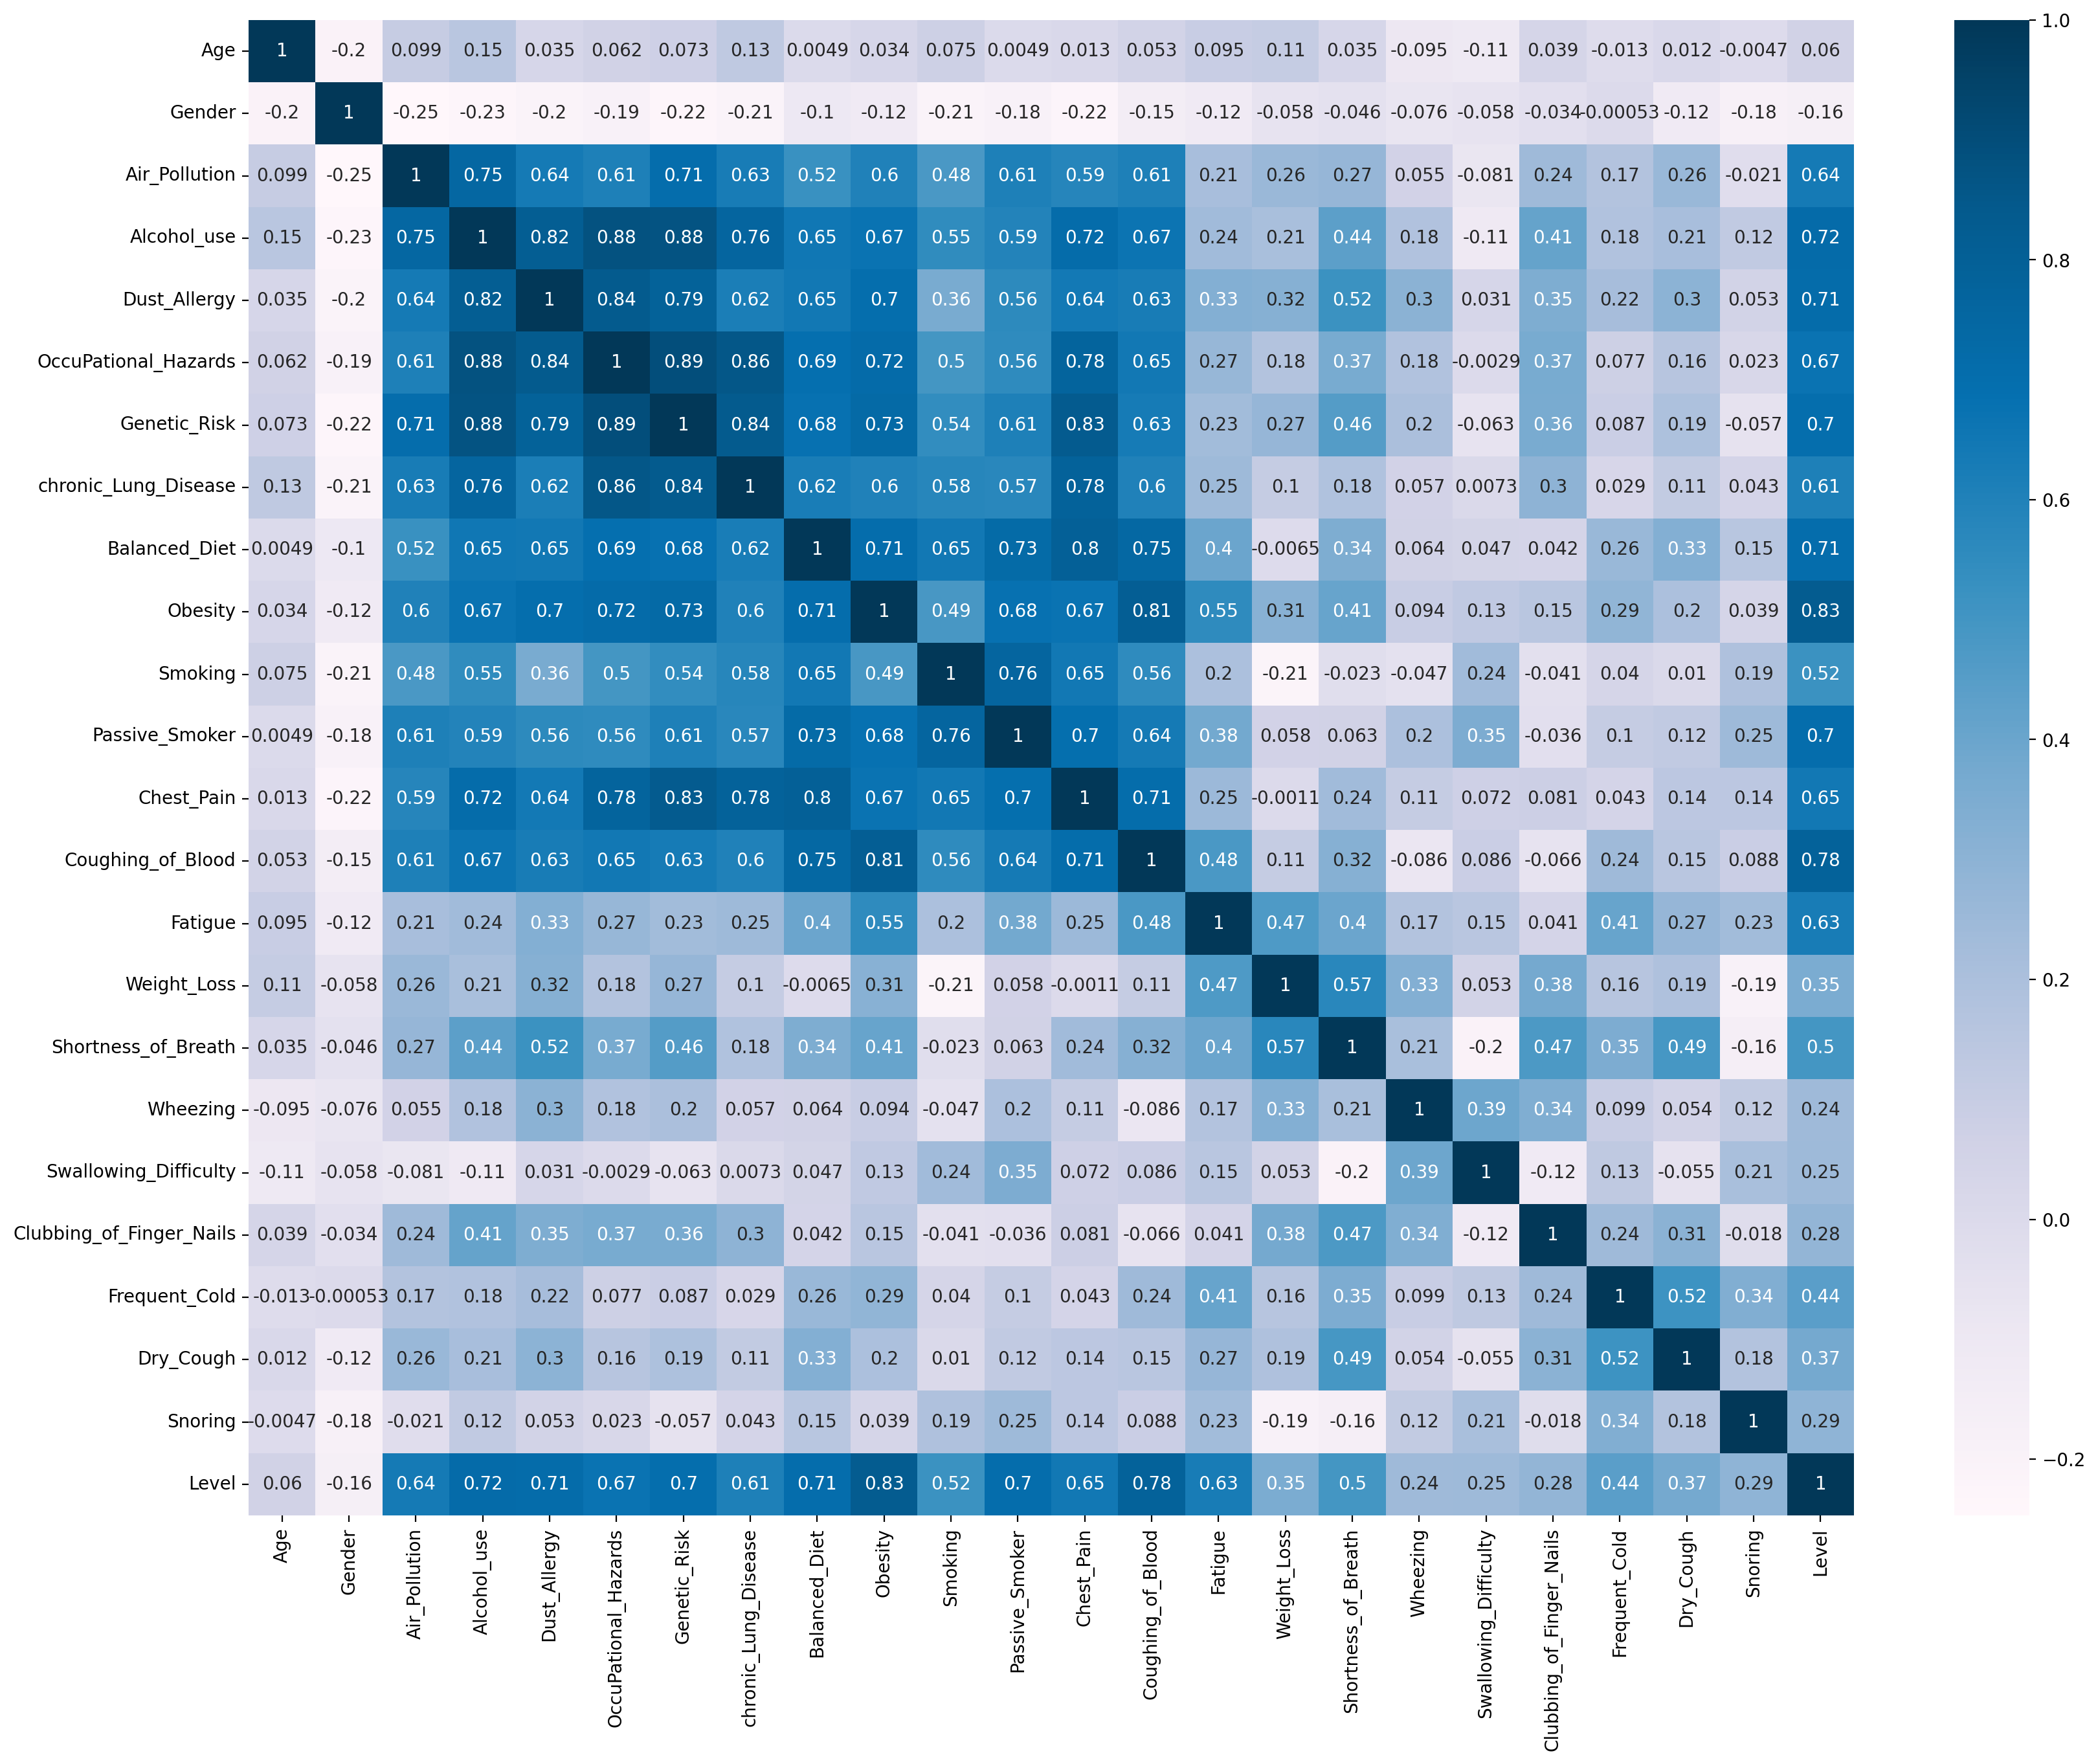

In [13]:
# Correlation Plot
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)
save_path = os.path.join(plot_save, "Correlation.png")
plt.savefig(save_path)
plt.show()

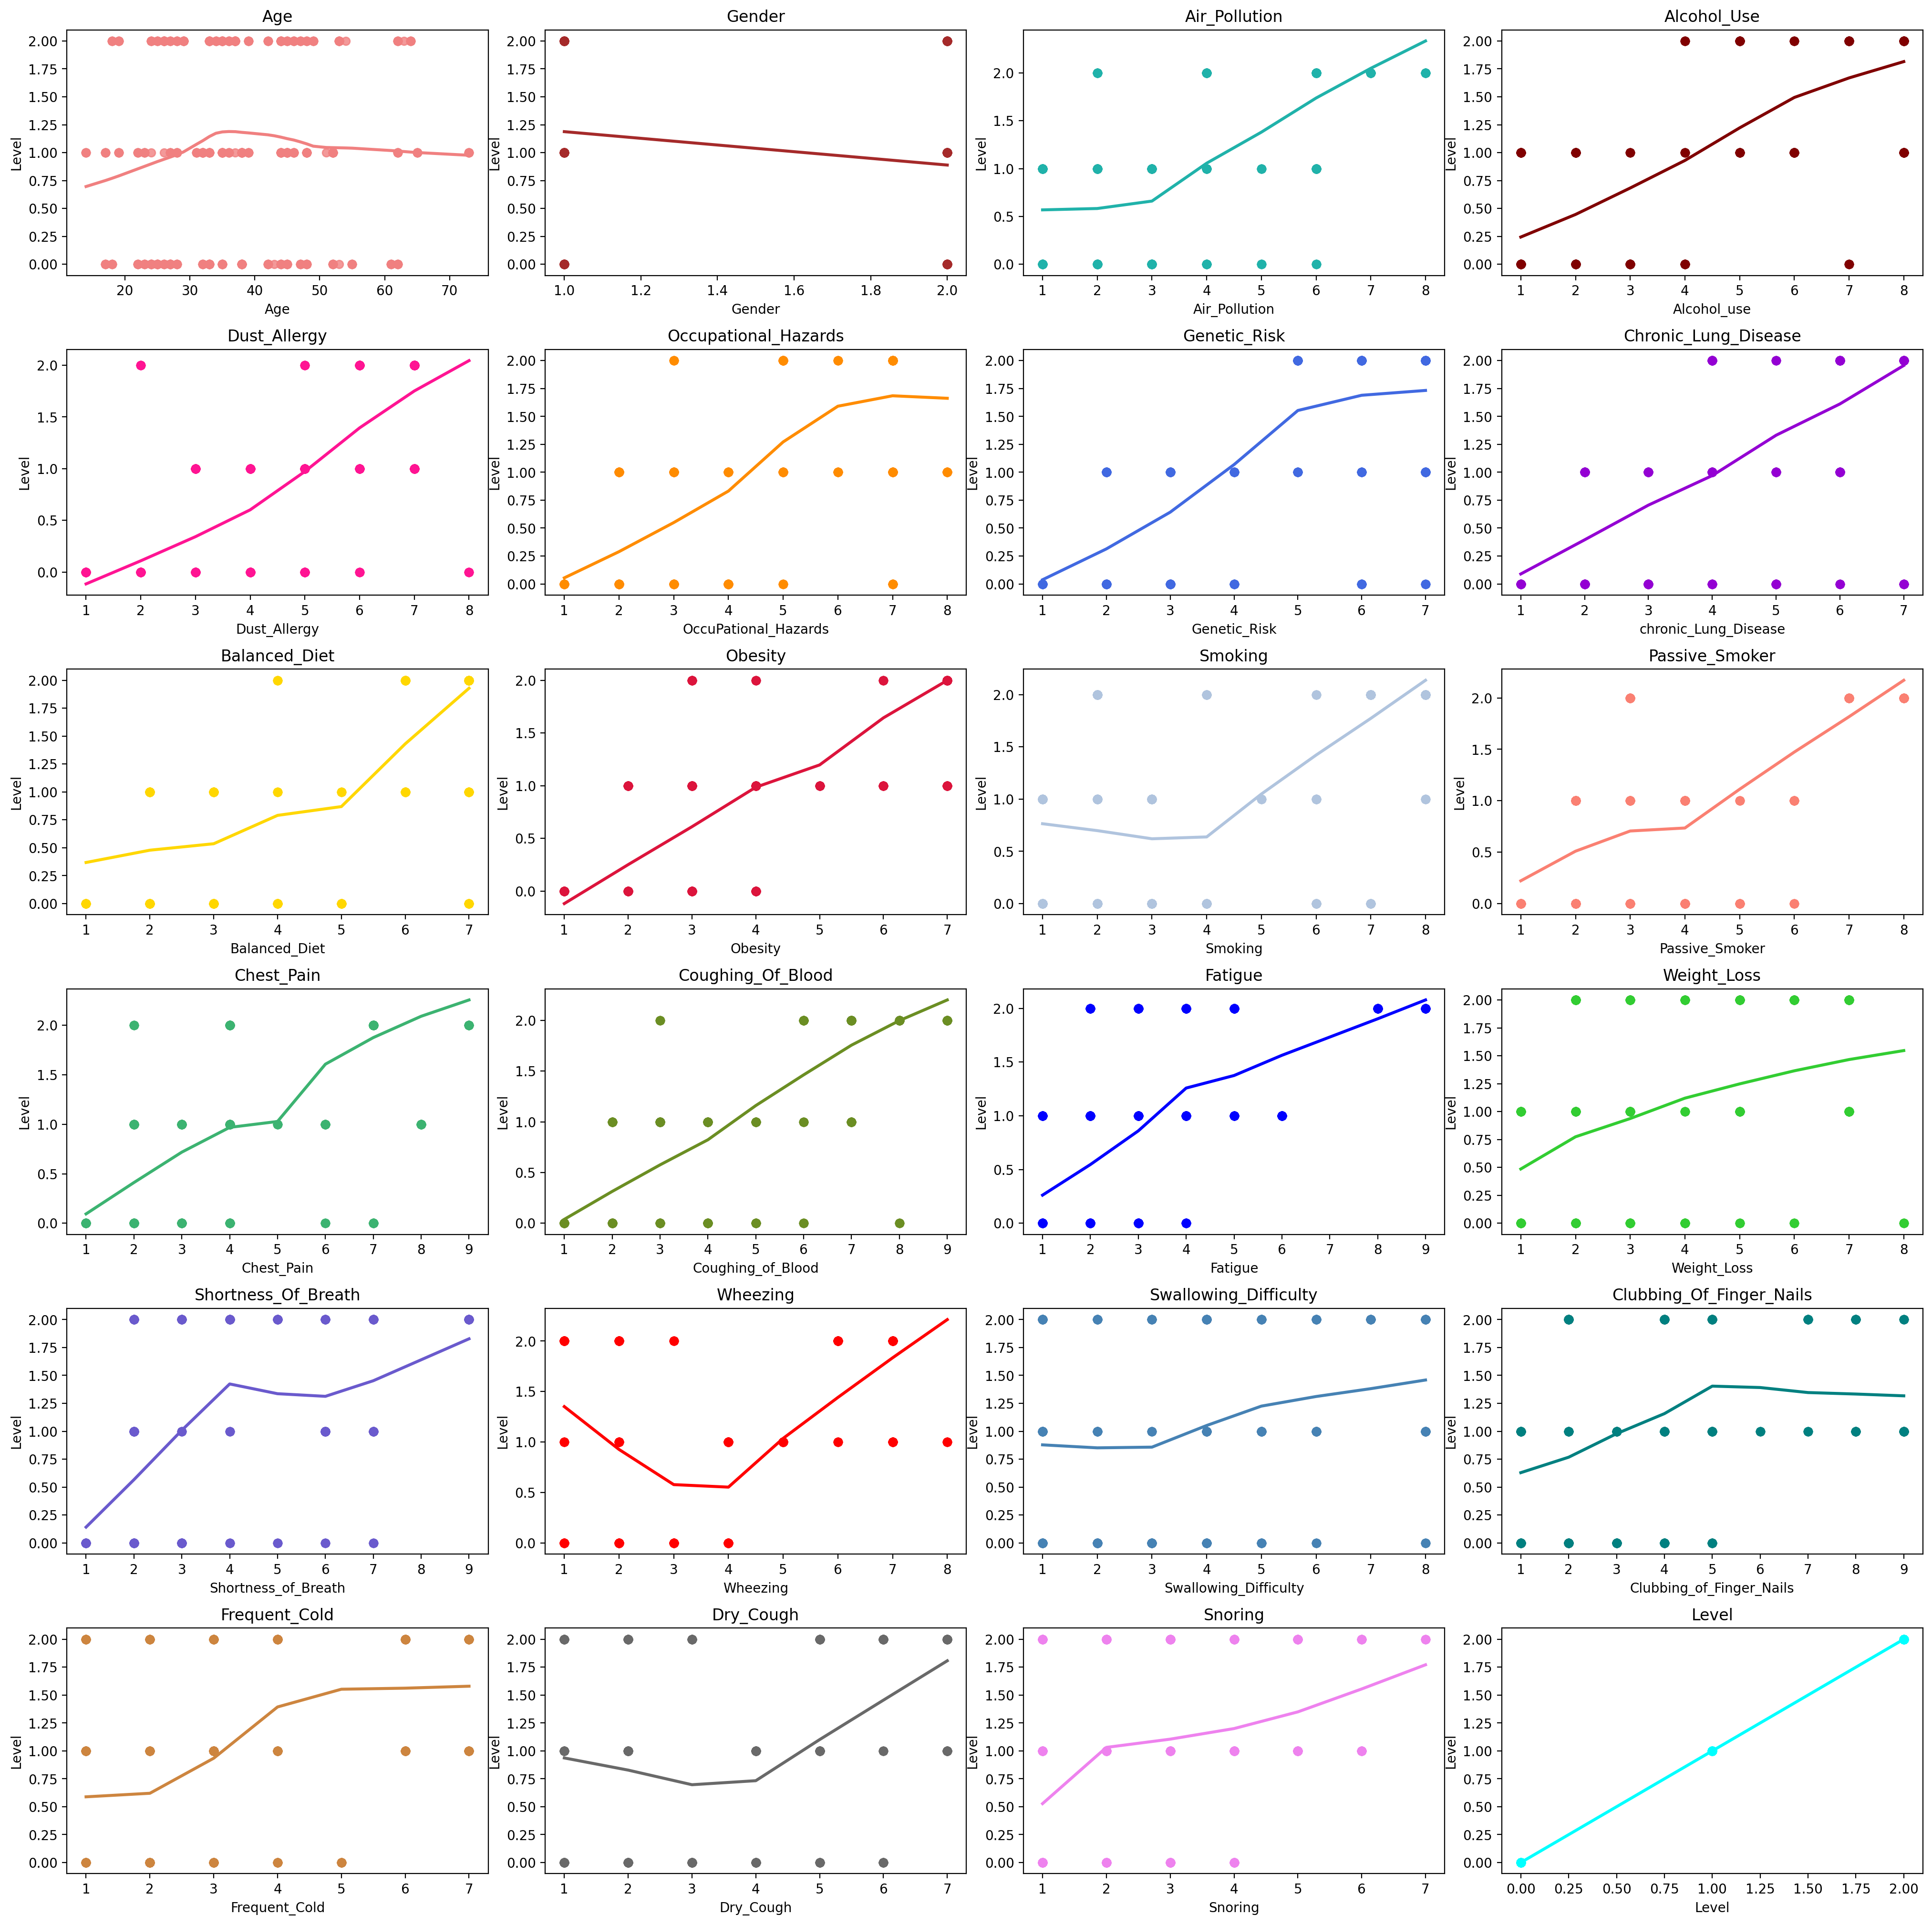

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(data.columns):
    sns.regplot(x=col, y='Level', data=data, lowess=True, color=colors[i], ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
save_path = os.path.join(plot_save, "Relationship_X_and_Y.png")
plt.savefig(save_path)
plt.show()

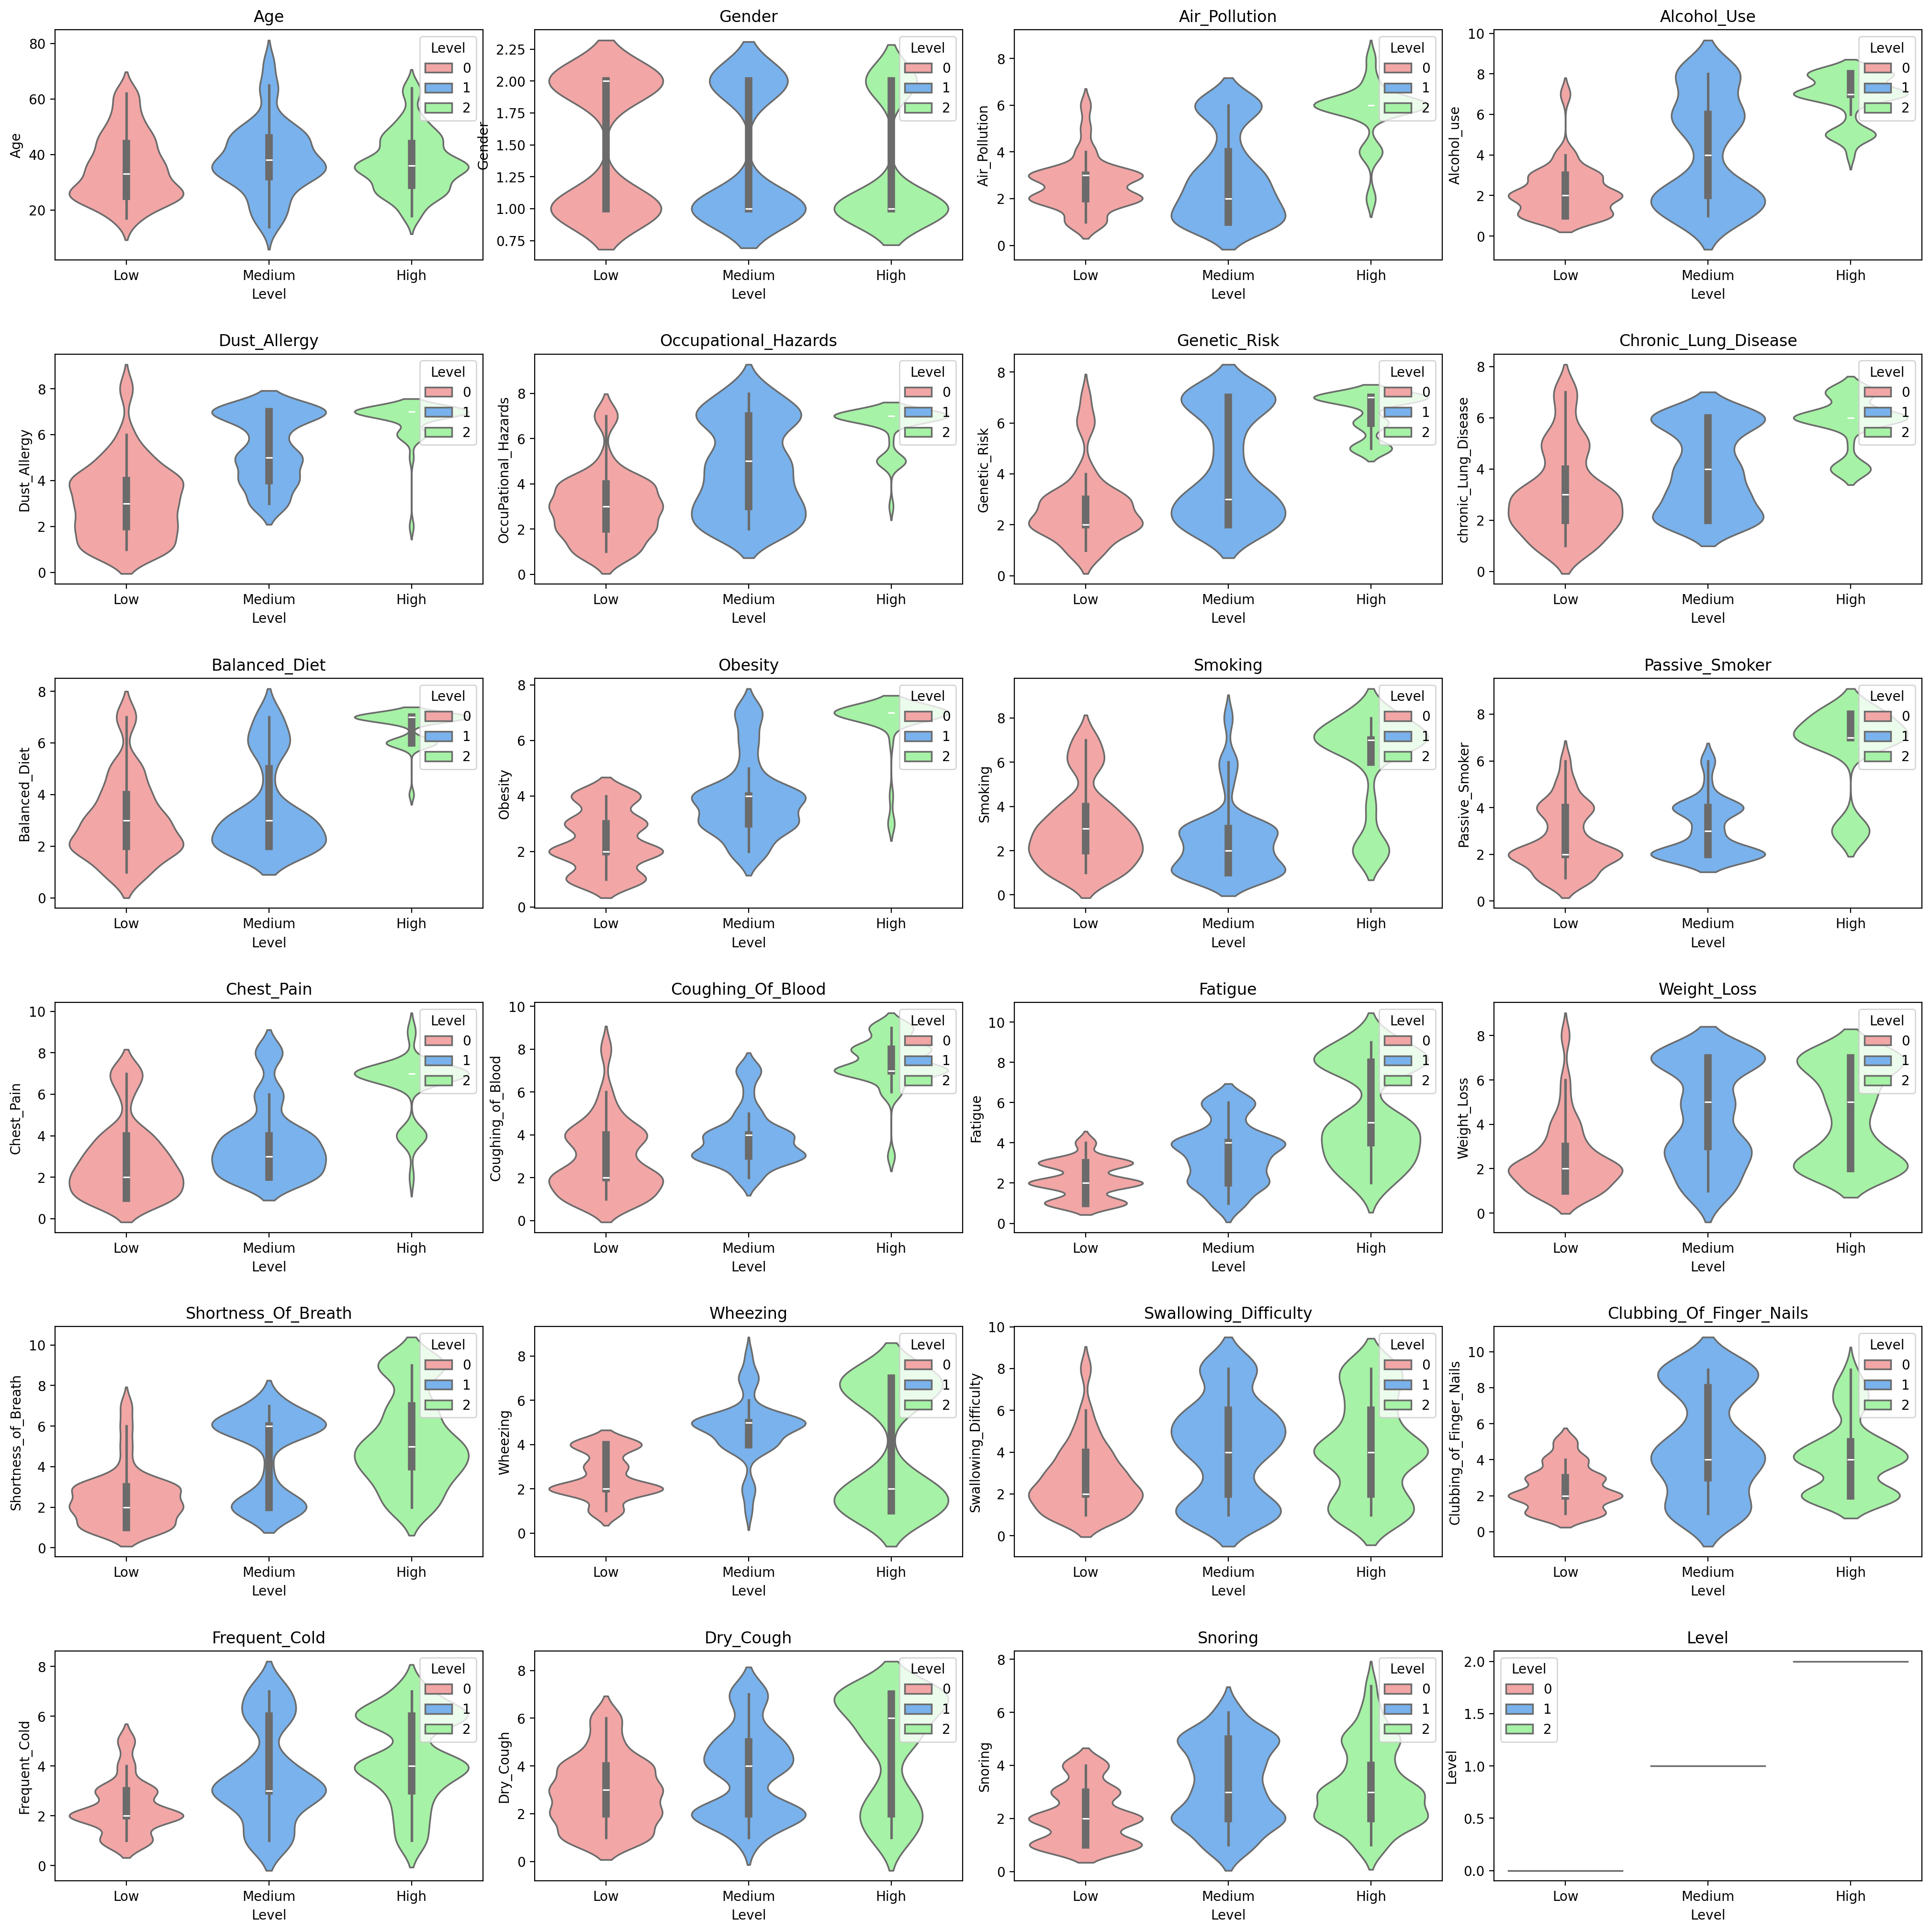

In [15]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(data.columns):
    sns.violinplot(x=data['Level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=data, hue='Level', palette=["#FF9999", "#66B2FF", "#99FF99"], ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
save_path = os.path.join(plot_save, "Violin_Plot_1.png")
plt.savefig(save_path)
plt.show()

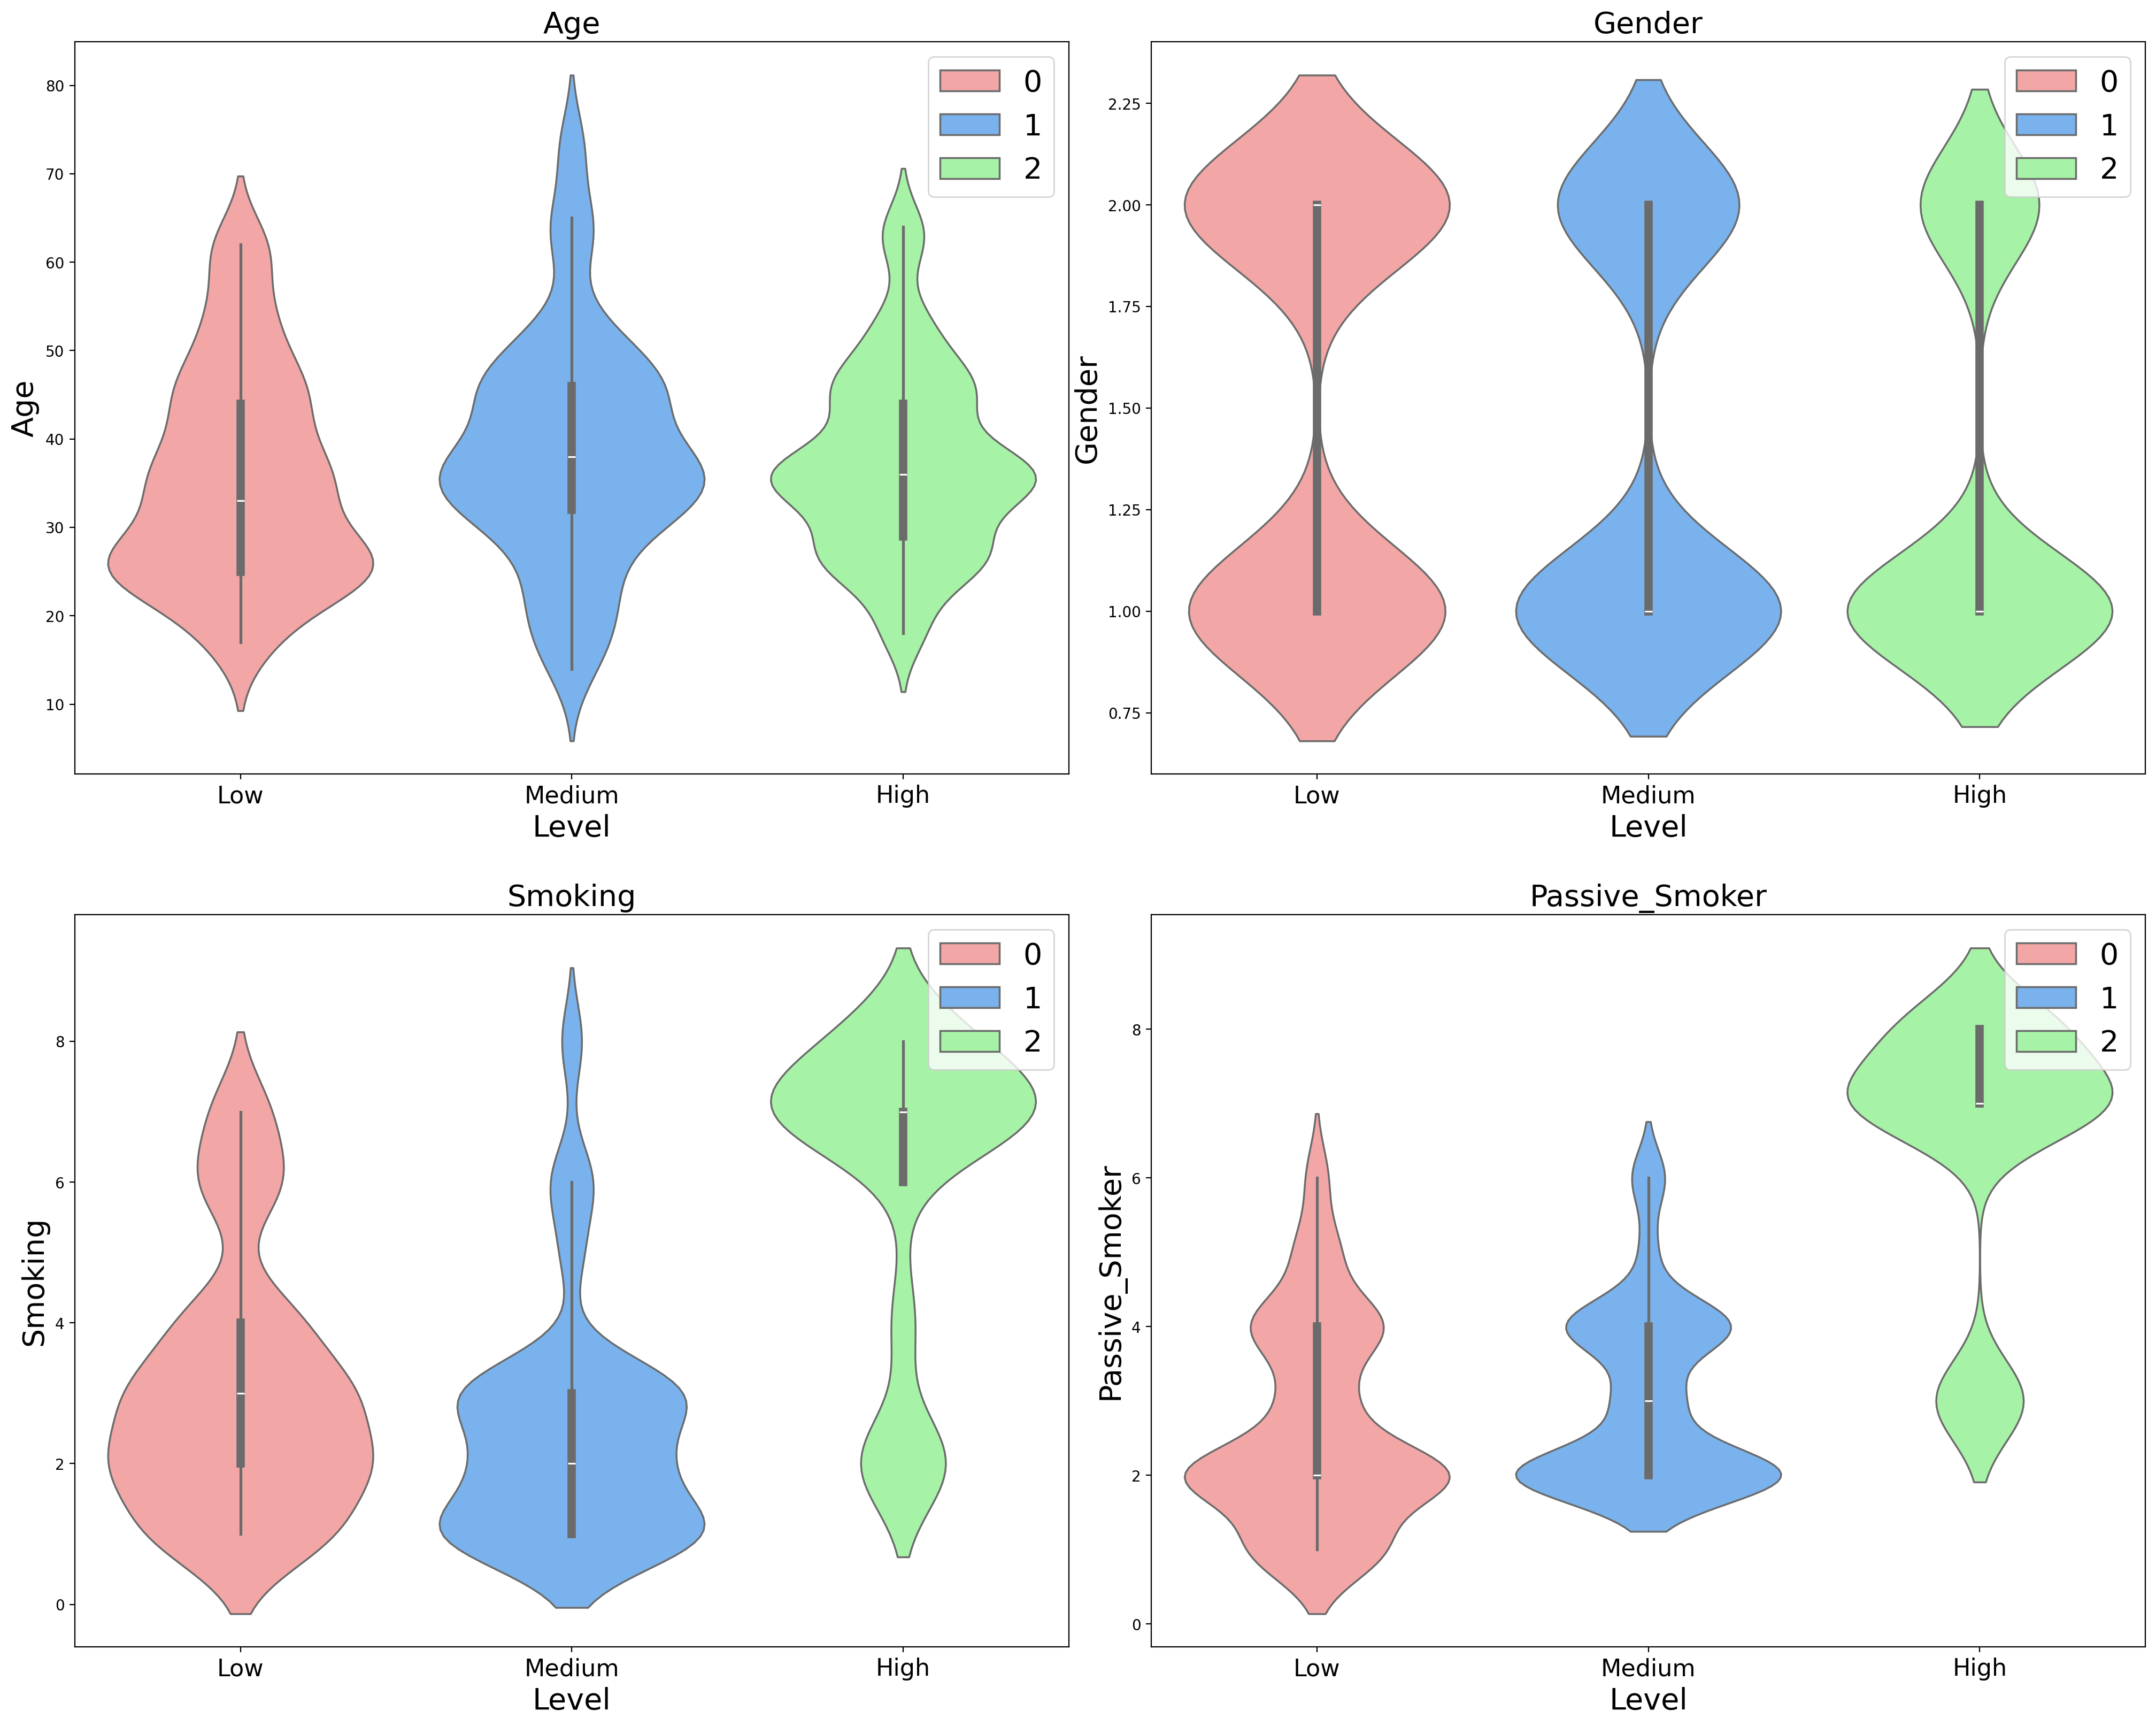

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 16))
ax = ax.flatten()
violin_data = ["Age", "Gender", "Smoking", "Passive_Smoker"]
for i, col in enumerate(violin_data):
    sns.violinplot(x=data['Level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=data, hue='Level', palette=["#FF9999", "#66B2FF", "#99FF99"], ax=ax[i])
    ax[i].set_title(col.title(), fontsize=20)  # title font size
    ax[i].set_xlabel("Level", fontsize=20)  # x-axis font size
    ax[i].set_ylabel(col, fontsize=20)  # y-axis font size
    ax[i].legend(fontsize=20)       # legend font size
    ax[i].tick_params(axis='x', labelsize=16)

plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
save_path = os.path.join(plot_save, "Violin_Plot_2.png")
plt.savefig(save_path)
plt.show()

In [12]:
# Model Building
X = data.drop(columns='Level')
y = data.Level

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
Level
2    248
1    233
0    219
Name: count, dtype: int64


In [24]:
#  Multinomial Logistic Regression

In [36]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)
MR.fit(X_train, y_train)
MR_pred = MR.predict(X_test)
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 31.29312235  -0.22054053 -31.07258182]
Coefficients: 
 [[-0.03325332  0.00497235 -0.08217101 -0.34696198 -0.27285889 -0.02569707
  -0.40194171 -0.18396137 -0.04514668 -0.82479508  0.01218617 -0.74724159
   0.2208233  -0.66279276 -0.61070697  0.00750711 -0.24218824 -0.76420915
  -0.67667375 -0.64055165 -0.54521994 -0.41651086 -0.57915725]
 [ 0.03581265 -0.06268017 -0.36679913 -0.15577936  0.36151575  0.04551655
   0.19059323 -0.11011265 -0.2505617   0.38436573 -0.12718767  0.09779993
  -0.29146798 -0.05111876 -0.07286216 -0.34955335 -0.17692707  0.64327647
  -0.02525427  0.28673054  0.21063852  0.04716591  0.3995049 ]
 [-0.00255932  0.05770782  0.44897014  0.50274135 -0.08865686 -0.01981948
   0.21134847  0.29407402  0.29570838  0.44042935  0.1150015   0.64944166
   0.07064467  0.71391152  0.68356913  0.34204624  0.41911531  0.12093268
   0.70192802  0.35382111  0.33458142  0.36934495  0.17965235]]


In [38]:
# Confusion Matrix
def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.Blues):
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    save_path = os.path.join(plot_save, ".png")
    plt.savefig(save_path)
    plt.show()


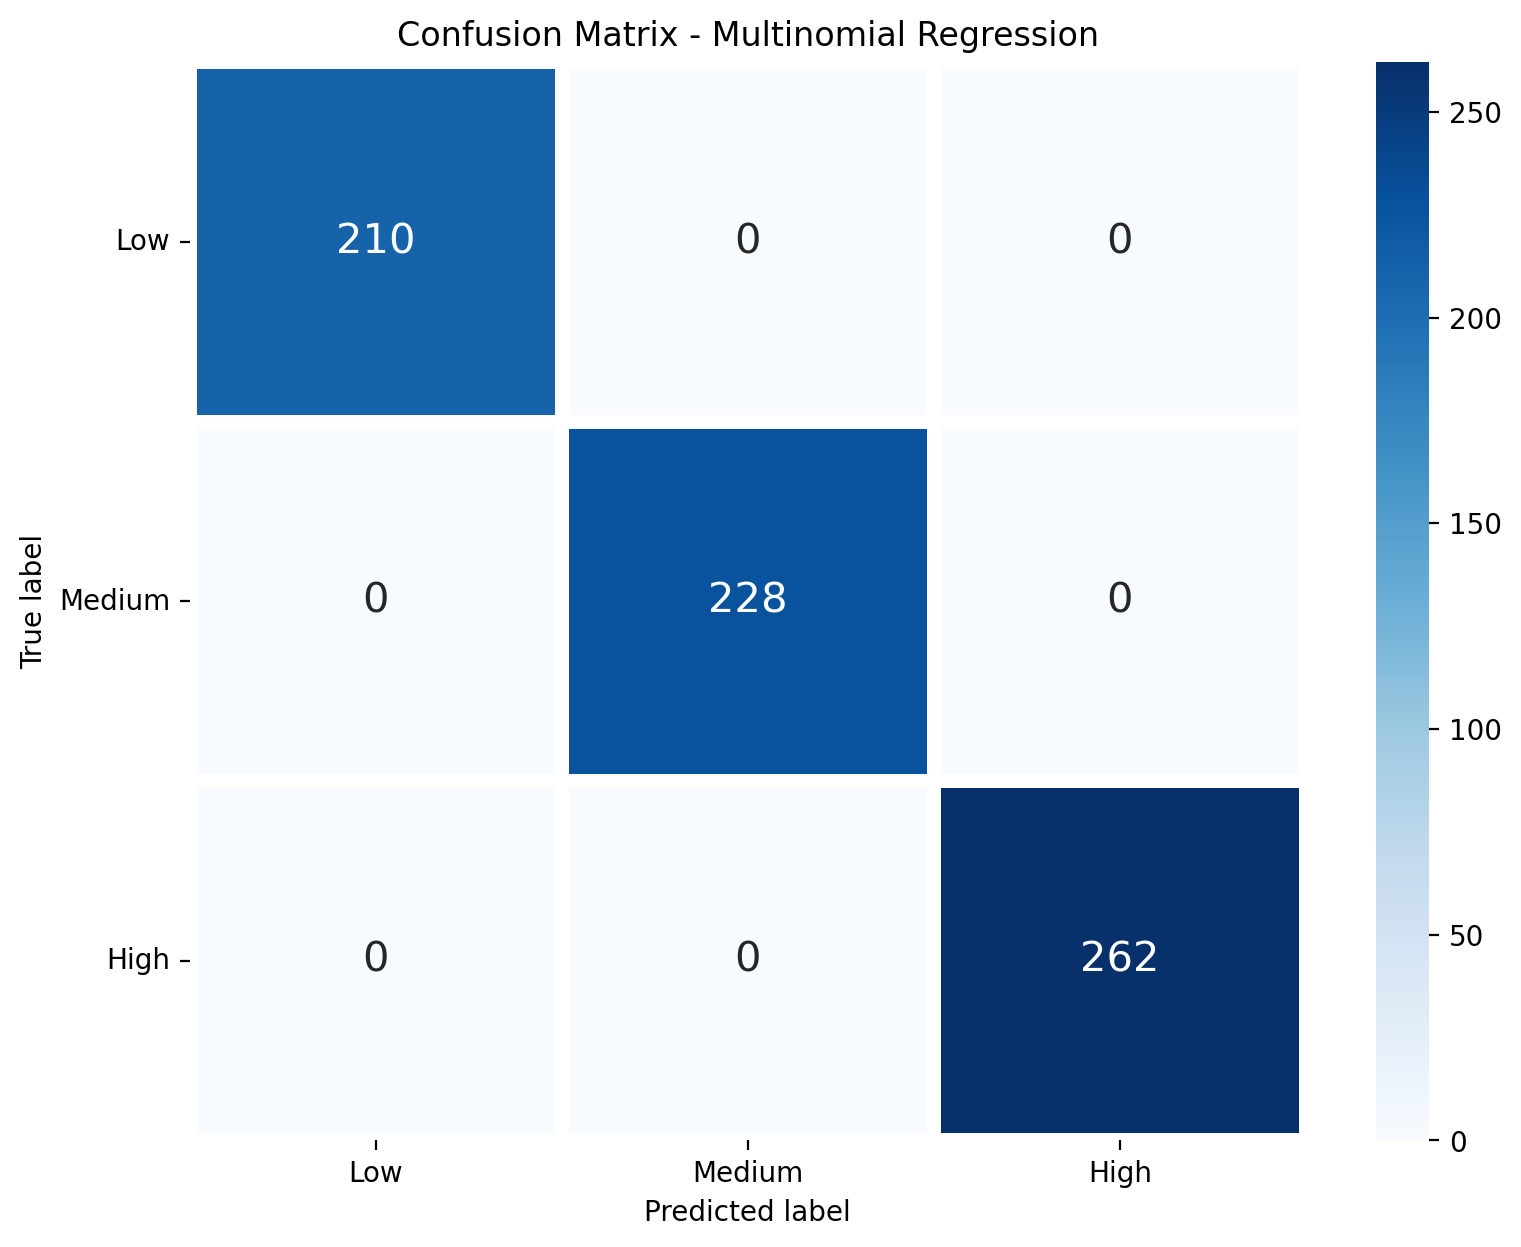

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       262

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [28]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')
print(classification_report(y_test, MR_pred))

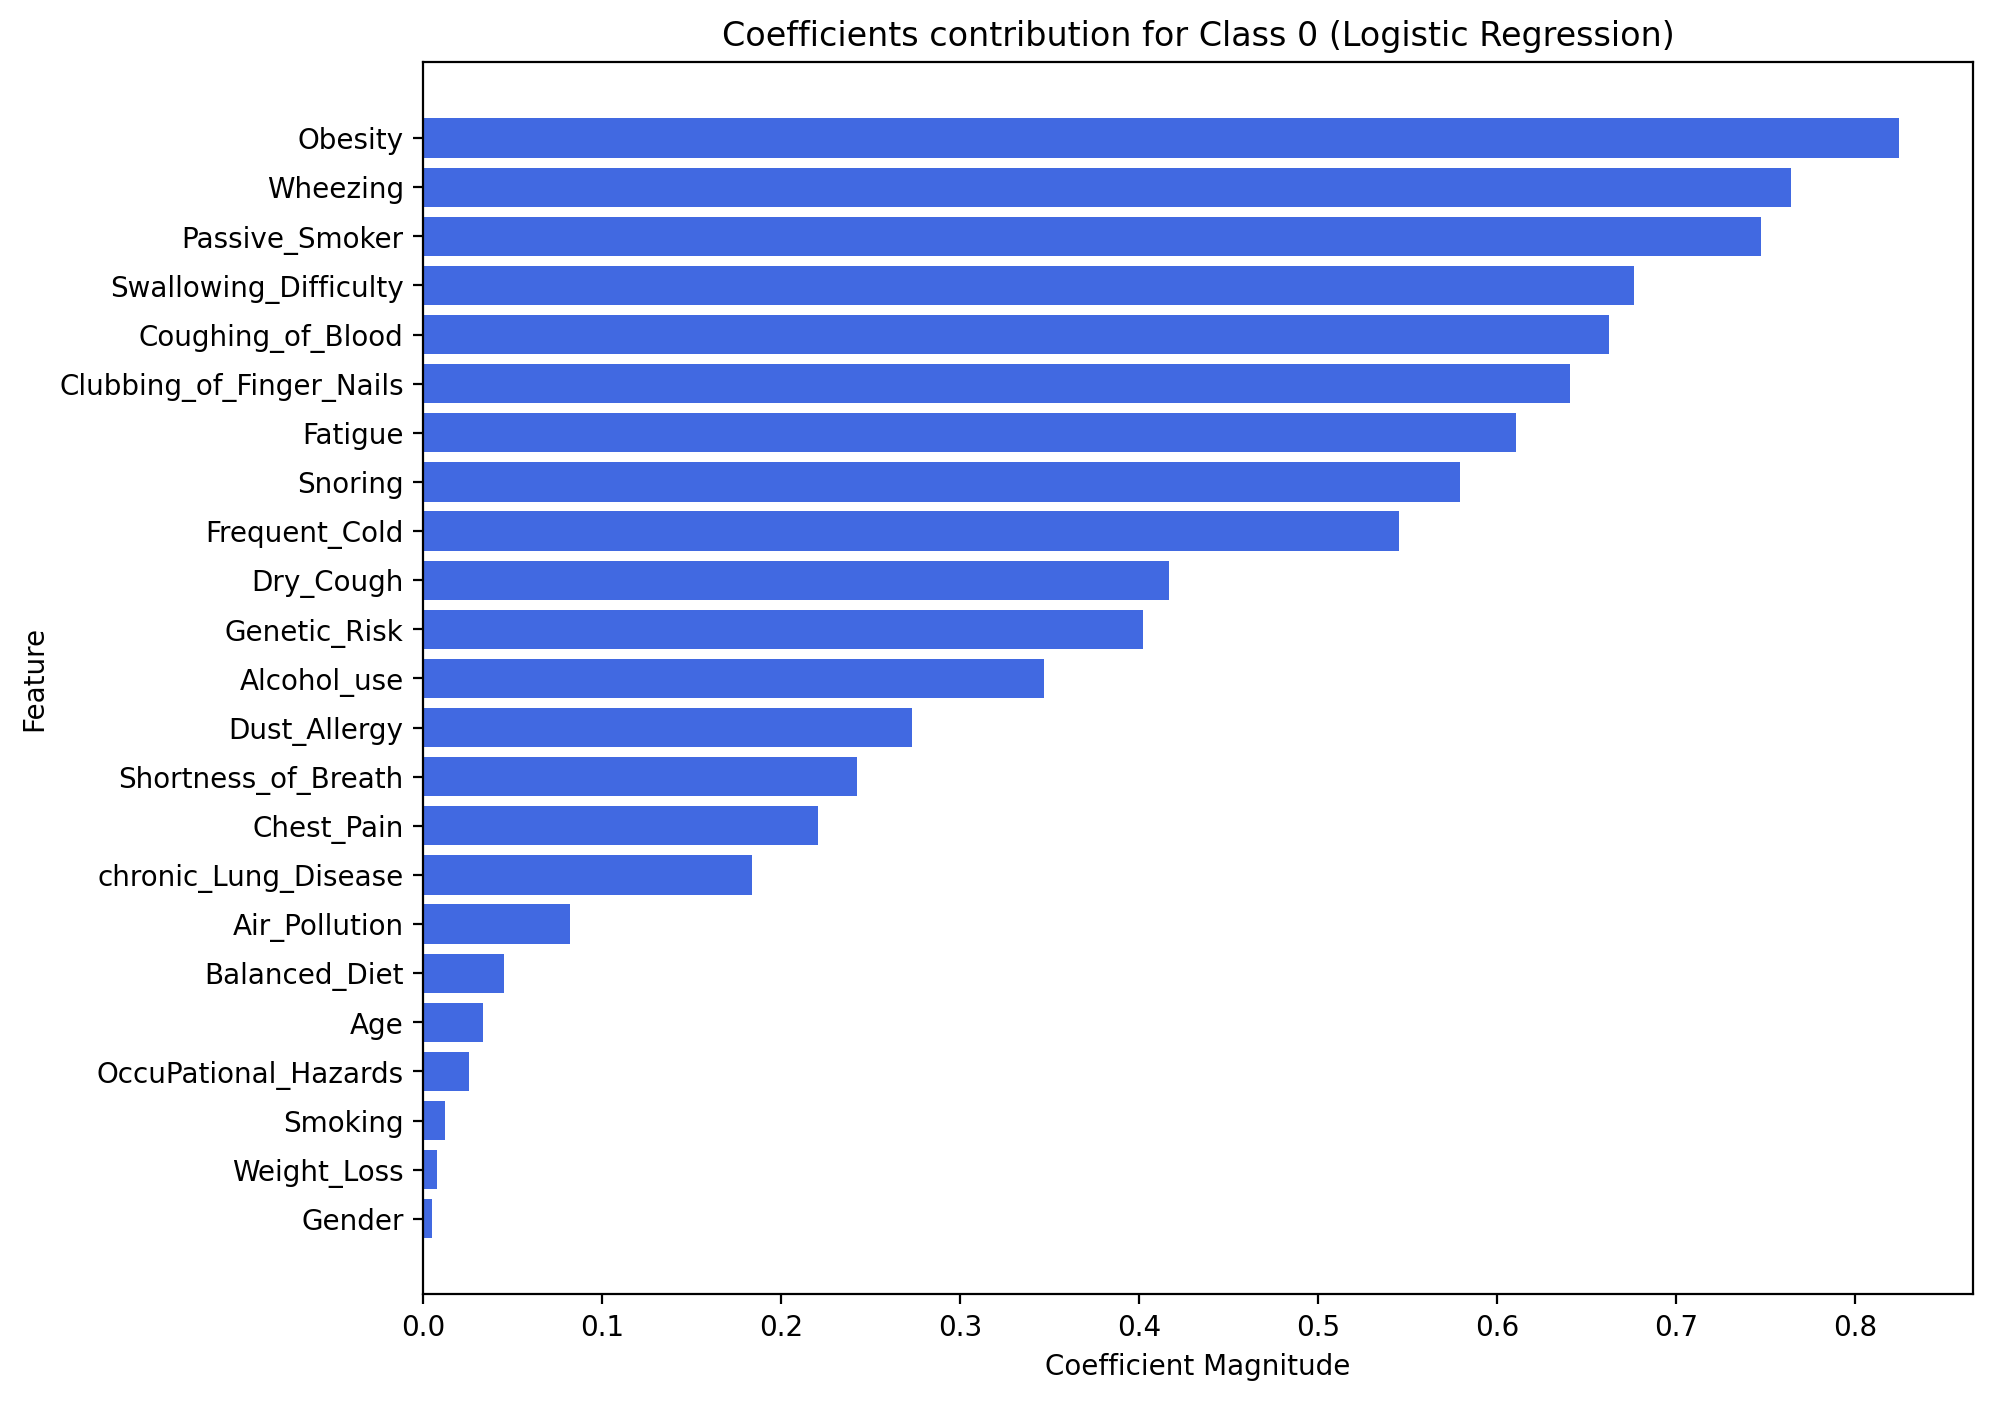

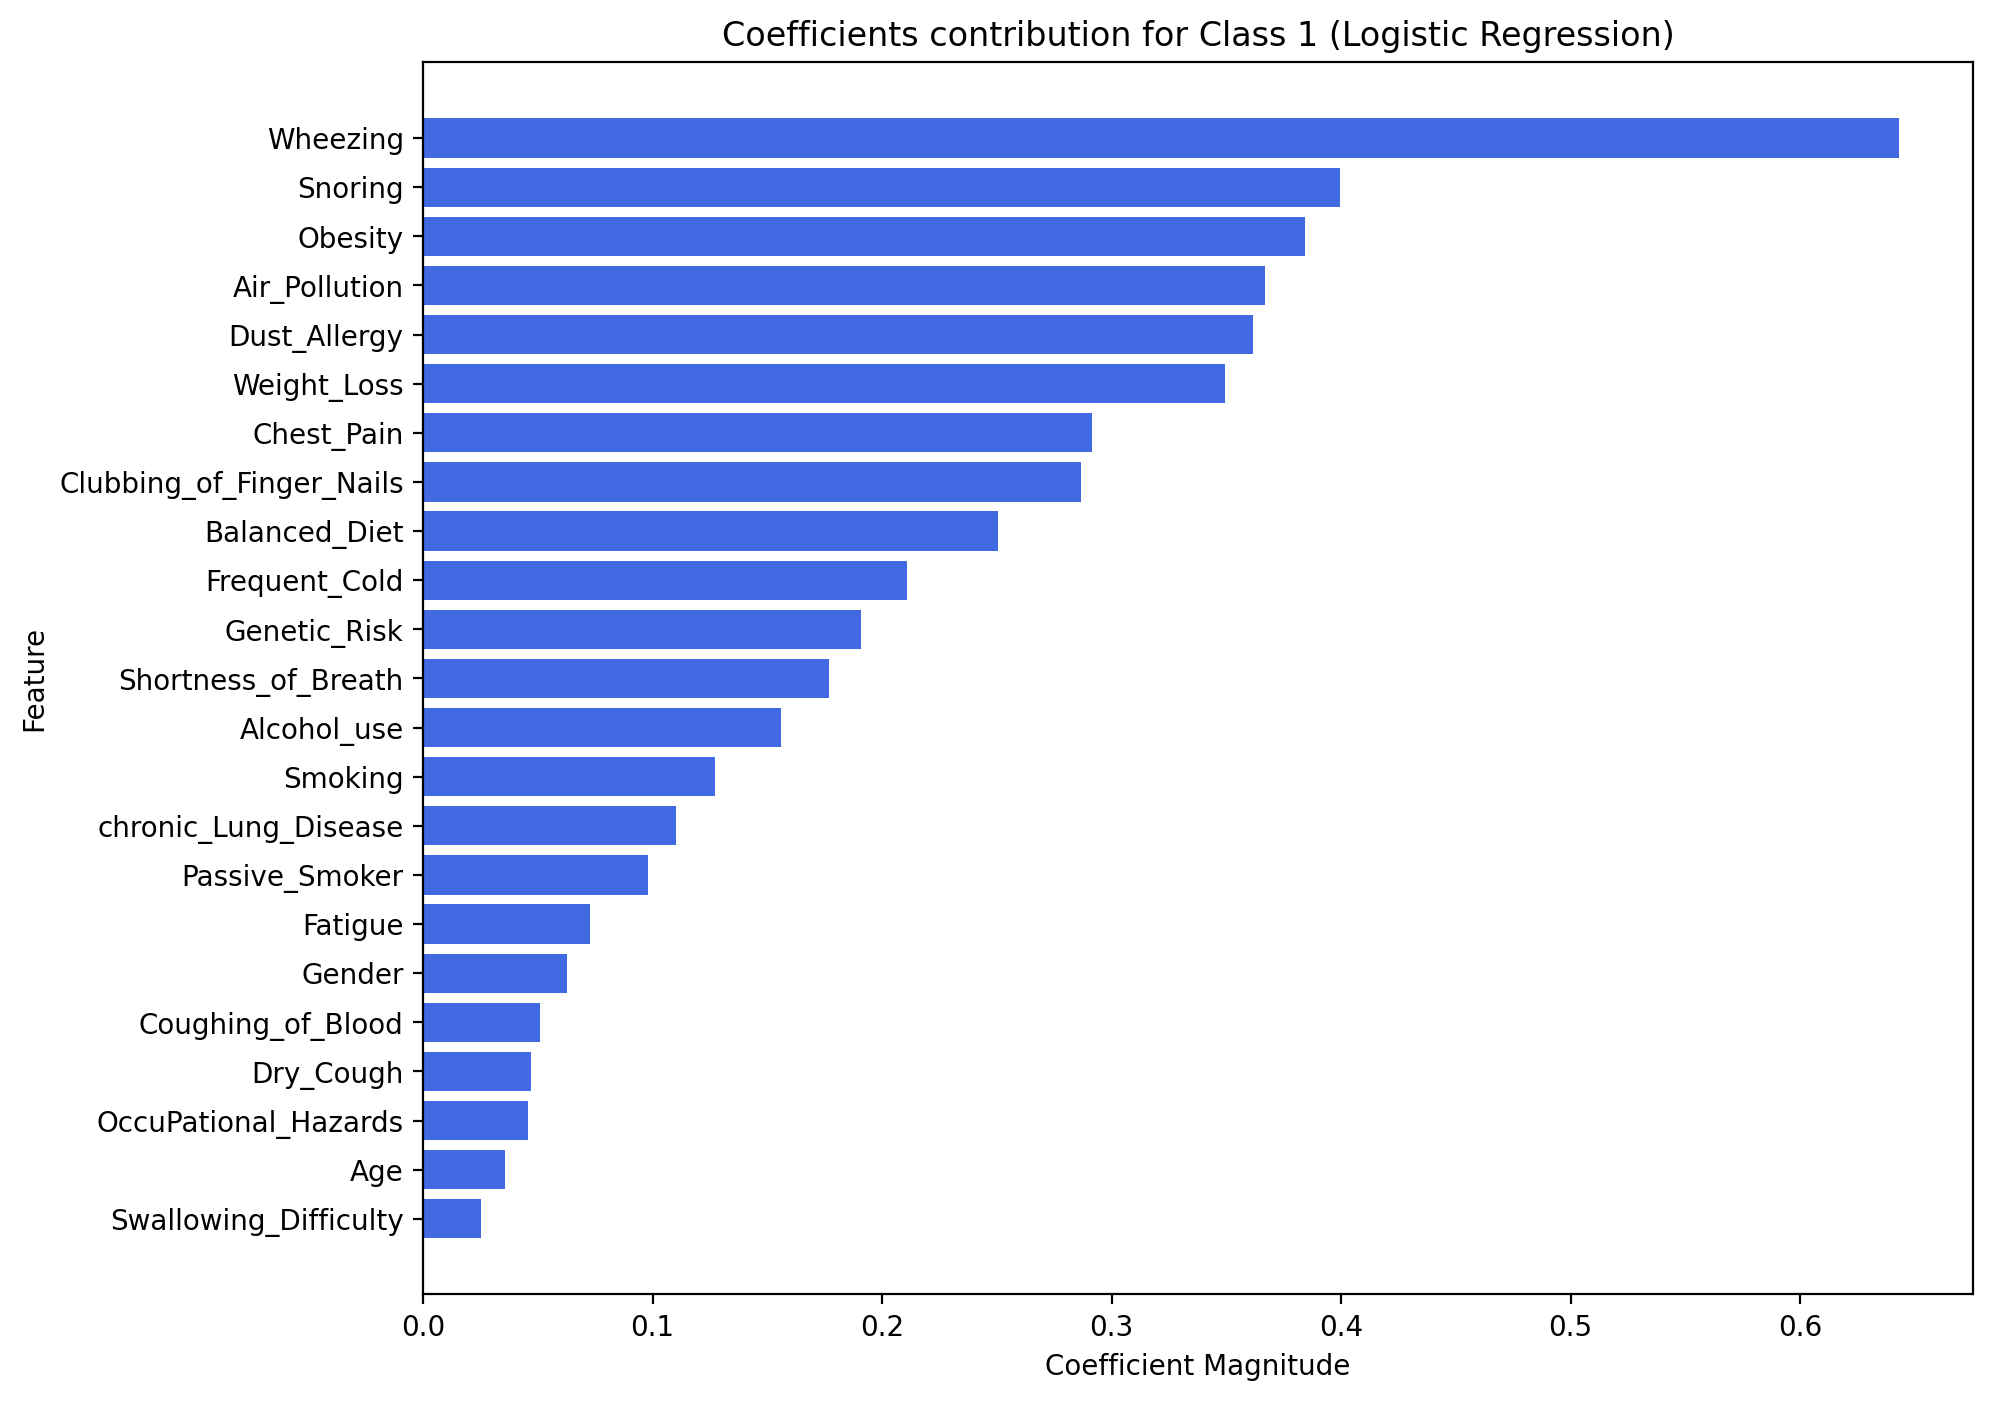

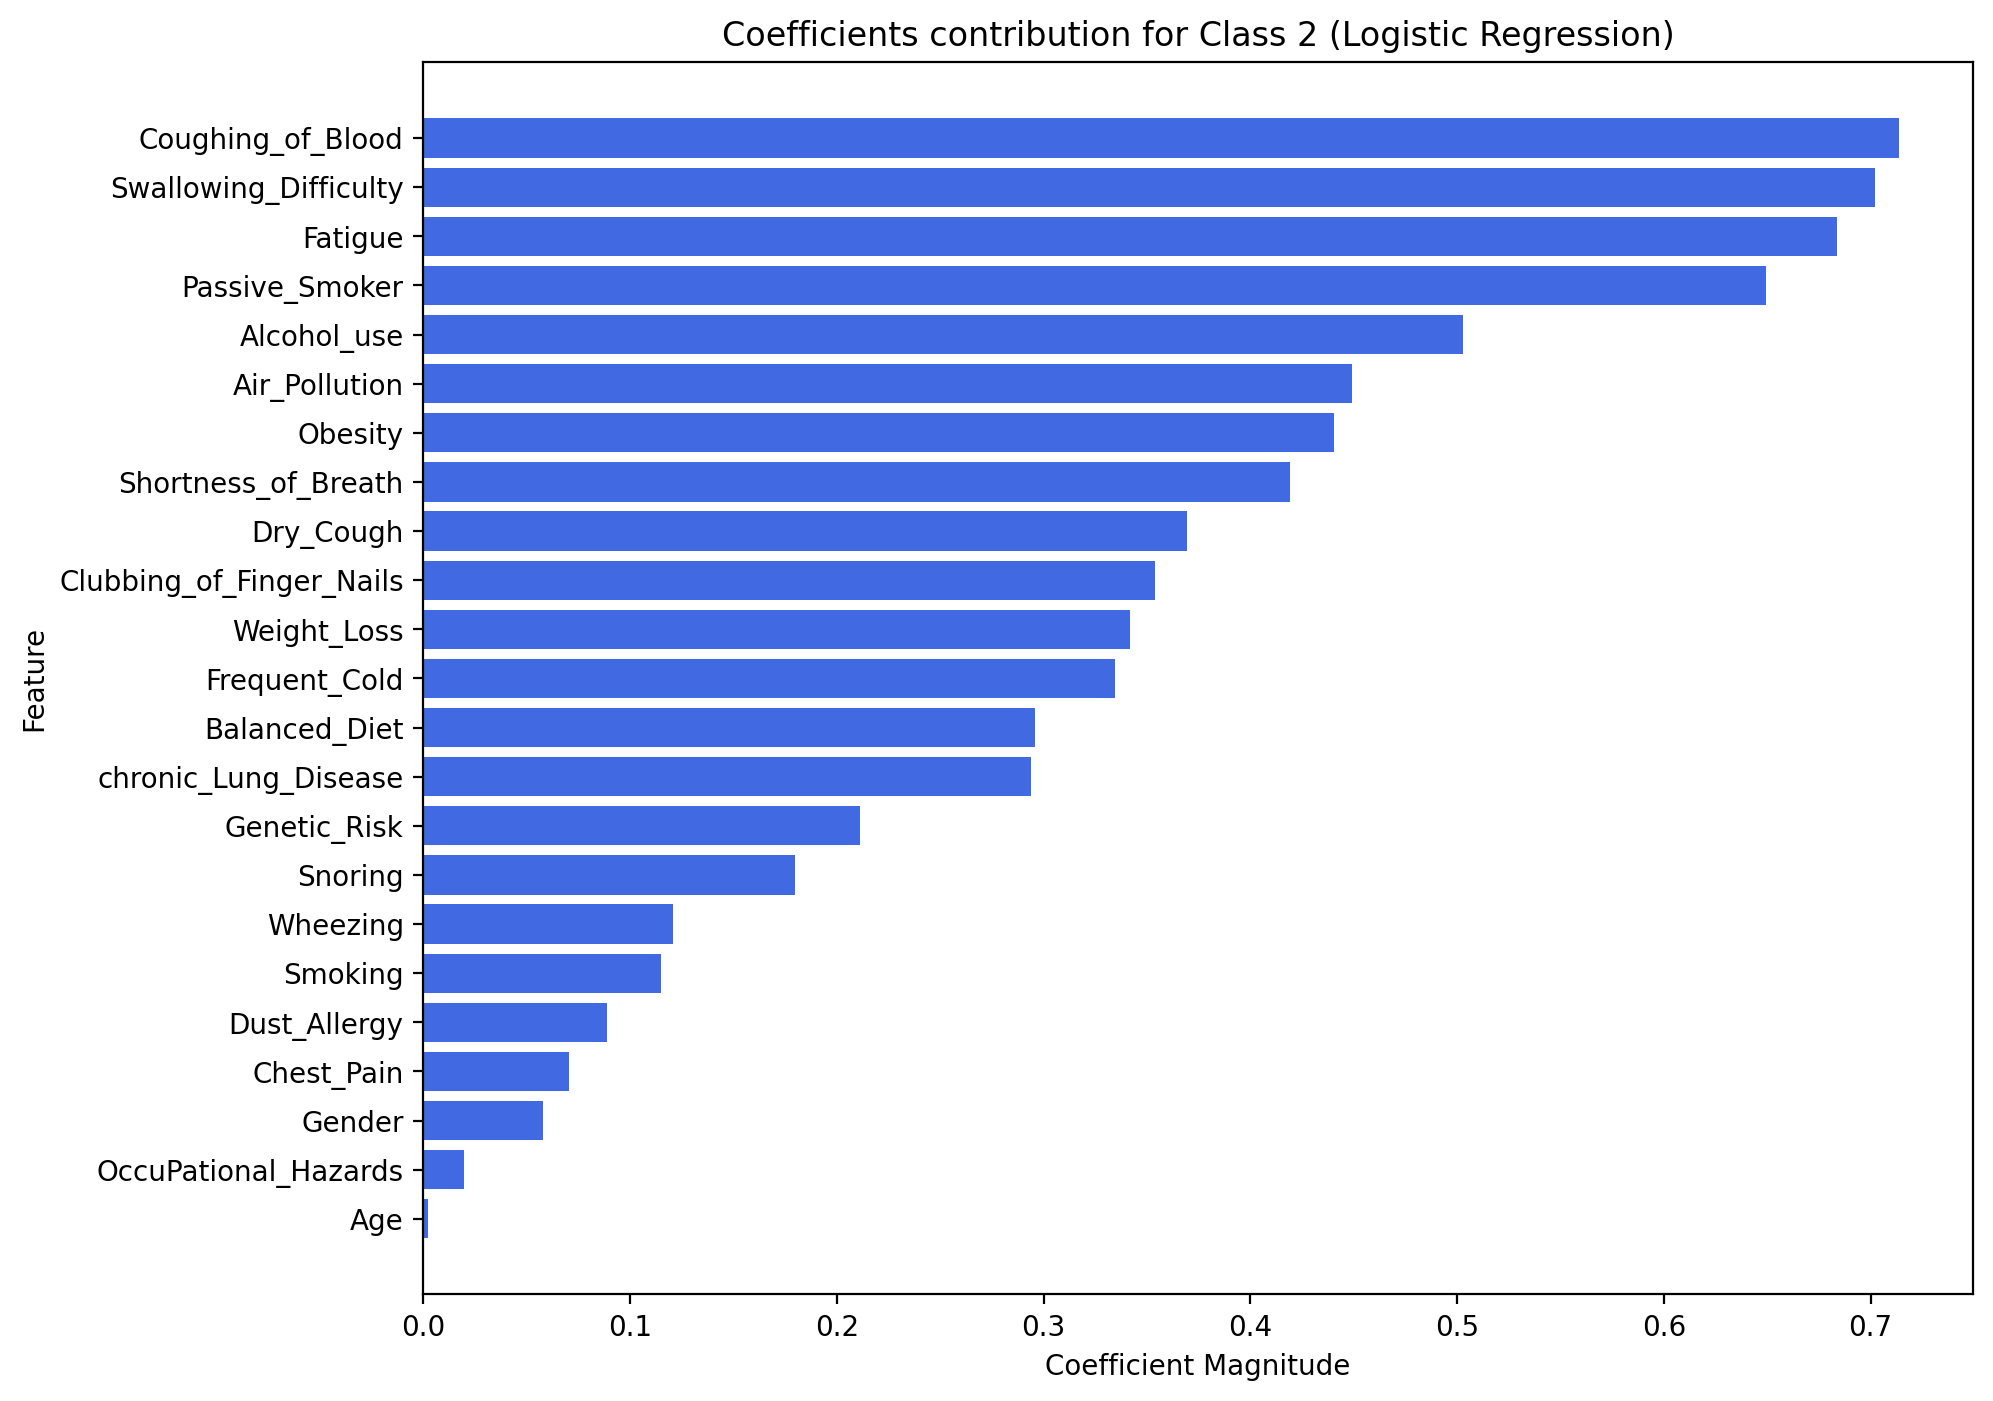

In [40]:
# Logistic Regression Coefficient Contribution Plot
feature_names = X_train.columns  
coefficients = abs(MR.coef_)

# plot 
for class_index in range(coefficients.shape[0]):
    # Sort the coefficients of the current category
    sorted_indices = np.argsort(np.abs(coefficients[class_index]))[::-1]
    sorted_coefficients = coefficients[class_index, sorted_indices]
    sorted_features = feature_names[sorted_indices]

    plt.figure(figsize=(10, 8))
    plt.barh(sorted_features, sorted_coefficients, color='#4169E1')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Feature')
    plt.title(f'Coefficients contribution for Class {class_index} (Logistic Regression)')
    plt.gca().invert_yaxis()  
    save_path = os.path.join(plot_save, f"MR_FI_{class_index}.png")
    plt.savefig(save_path)
    plt.show()

In [42]:
# Calculate CI of MR
MR_score = MR.score(X_test, y_test)
y_proba = MR.predict_proba(X_test)
n_samples = len(X_test)
std_error = np.sqrt((y_proba * (1 - y_proba)) / X_test.shape[0])
ci_lower = y_proba - 1.96 * std_error
ci_upper = y_proba + 1.96 * std_error

results = pd.DataFrame({
    'Class 0 Probability': y_proba[:, 0],
    'Class 0 CI Lower': ci_lower[:, 0],
    'Class 0 CI Upper': ci_upper[:, 0],
    'Class 1 Probability': y_proba[:, 1],
    'Class 1 CI Lower': ci_lower[:, 1],
    'Class 1 CI Upper': ci_upper[:, 1],
    'Class 2 Probability': y_proba[:, 2],
    'Class 2 CI Lower': ci_lower[:, 2],
    'Class 2 CI Upper': ci_upper[:, 2],
})
print(results)

     Class 0 Probability  Class 0 CI Lower  Class 0 CI Upper  \
0           1.105720e-06         -0.000077          0.000079   
1           1.367695e-04         -0.000730          0.001003   
2           9.008290e-01          0.878687          0.922971   
3           9.775777e-01          0.966610          0.988546   
4           9.892142e-01          0.981562          0.996866   
..                   ...               ...               ...   
695         7.550590e-03          0.001138          0.013963   
696         7.569246e-03          0.001149          0.013990   
697         5.064599e-07         -0.000052          0.000053   
698         9.999961e-01          0.999850          1.000142   
699         8.814064e-04         -0.001317          0.003080   

     Class 1 Probability  Class 1 CI Lower  Class 1 CI Upper  \
0               0.006053          0.000307          0.011800   
1               0.999415          0.997624          1.001206   
2               0.088219          0.067

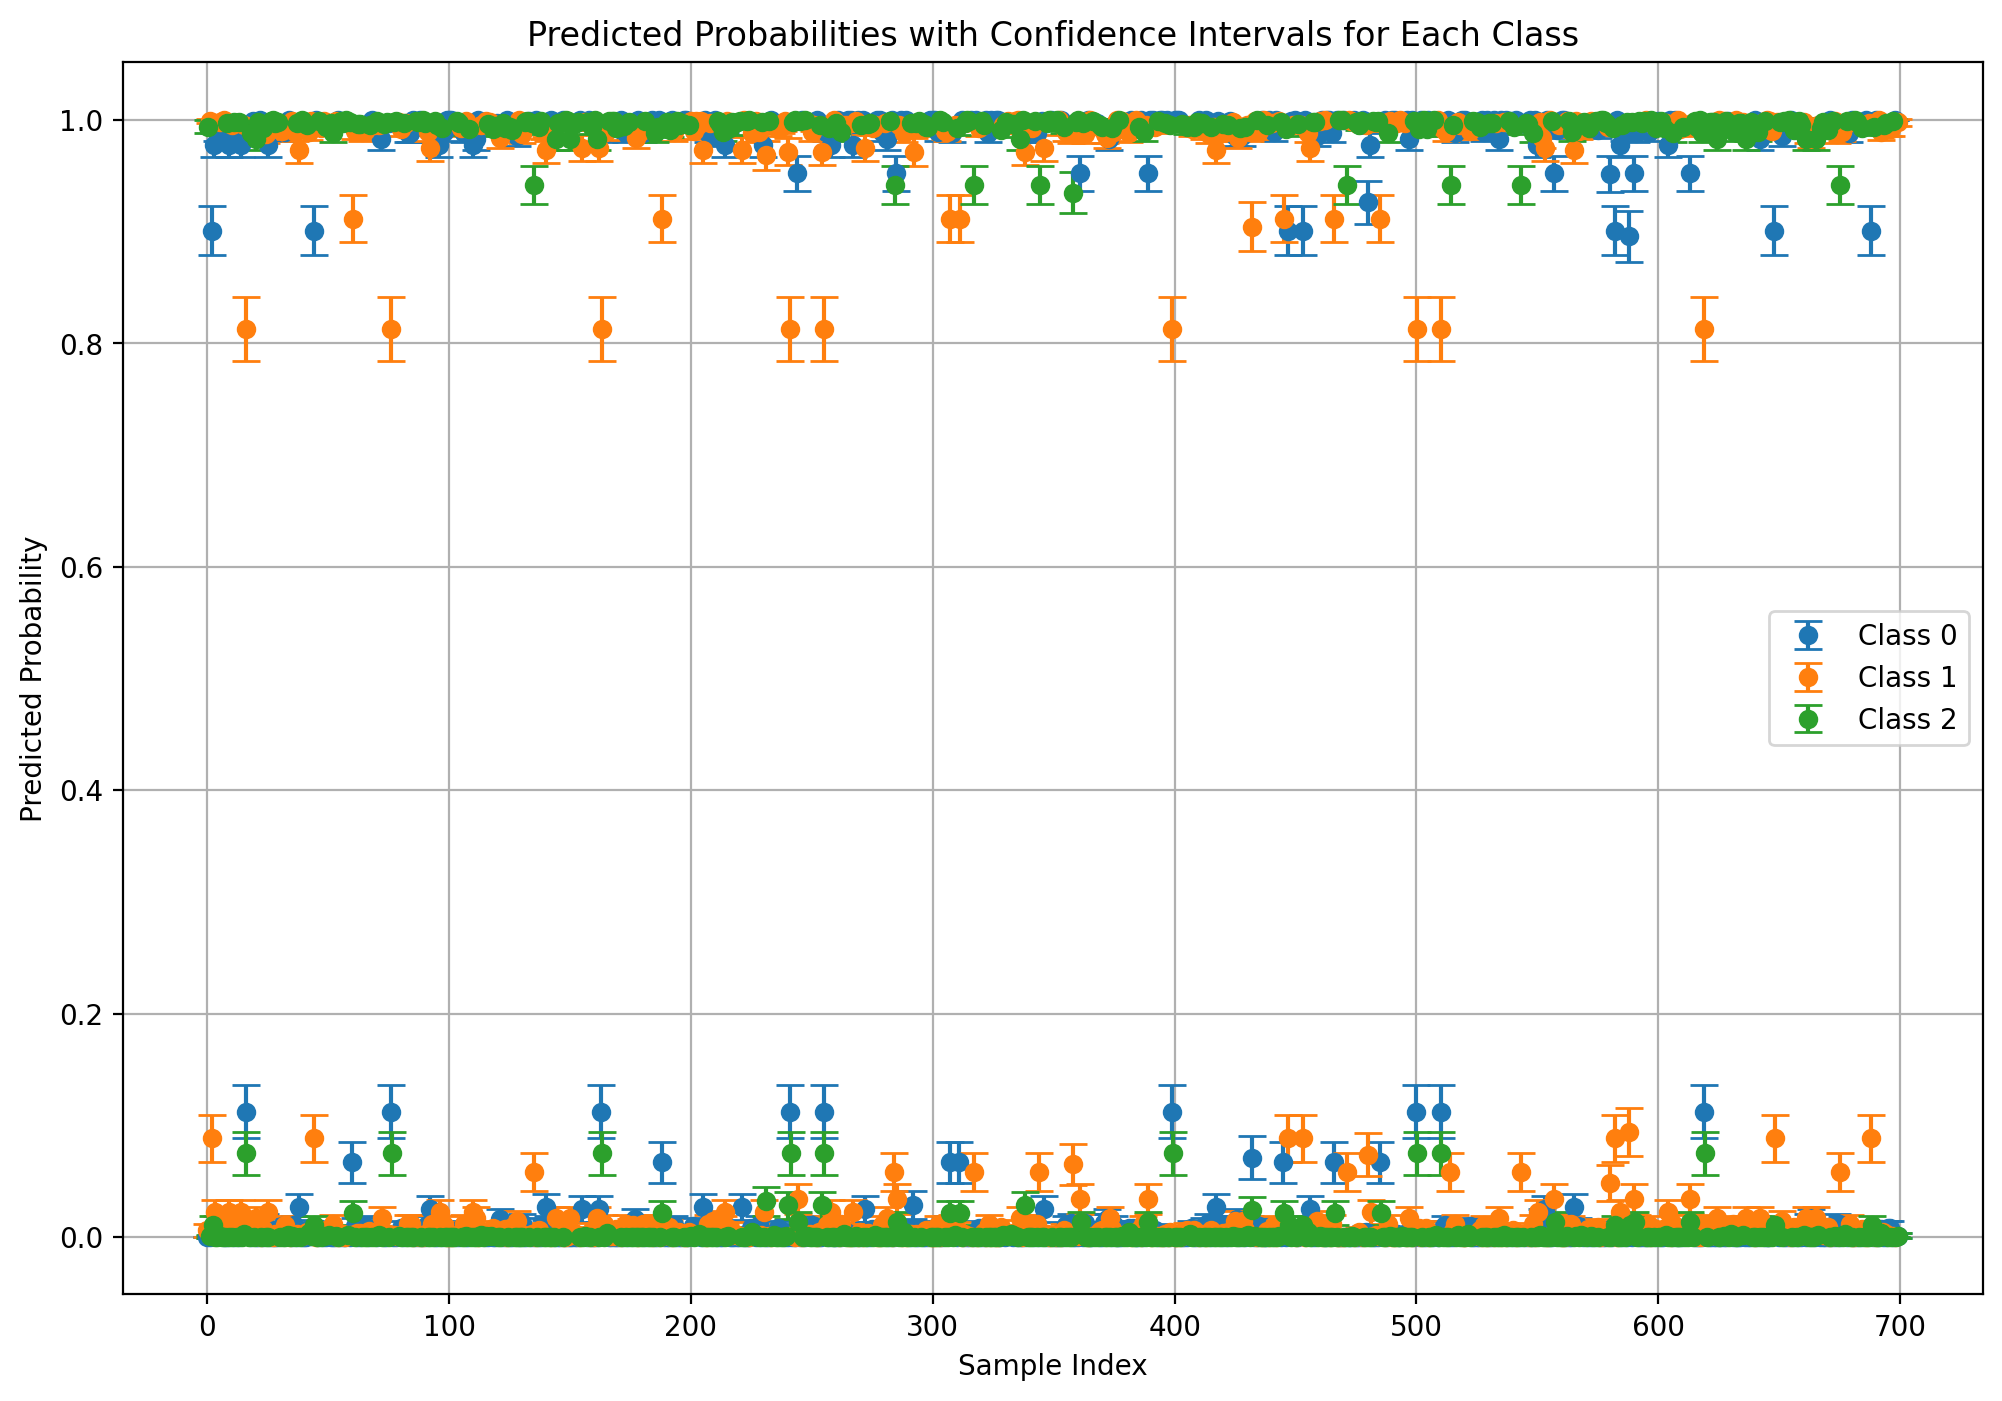

In [44]:
plt.figure(figsize=(12, 8))

# Plot the probability and confidence interval (CI) for each class
for i in range(3):  # 3 classes
    plt.errorbar(results.index + 0.1 * i,  # small x offset to distinguish different classes
                 results[f'Class {i} Probability'],
                 yerr=[results[f'Class {i} Probability'] - results[f'Class {i} CI Lower'],
                       results[f'Class {i} CI Upper'] - results[f'Class {i} Probability']],
                 fmt='o', label=f'Class {i}', capsize=5)

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities with Confidence Intervals for Each Class')
plt.legend()
plt.grid(True)
save_path = os.path.join(plot_save, "MR_CI.png")
plt.savefig(save_path)
plt.show()

In [31]:
# Random Forest

In [46]:
RF = RandomForestClassifier(n_estimators=100, random_state=40)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       262

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



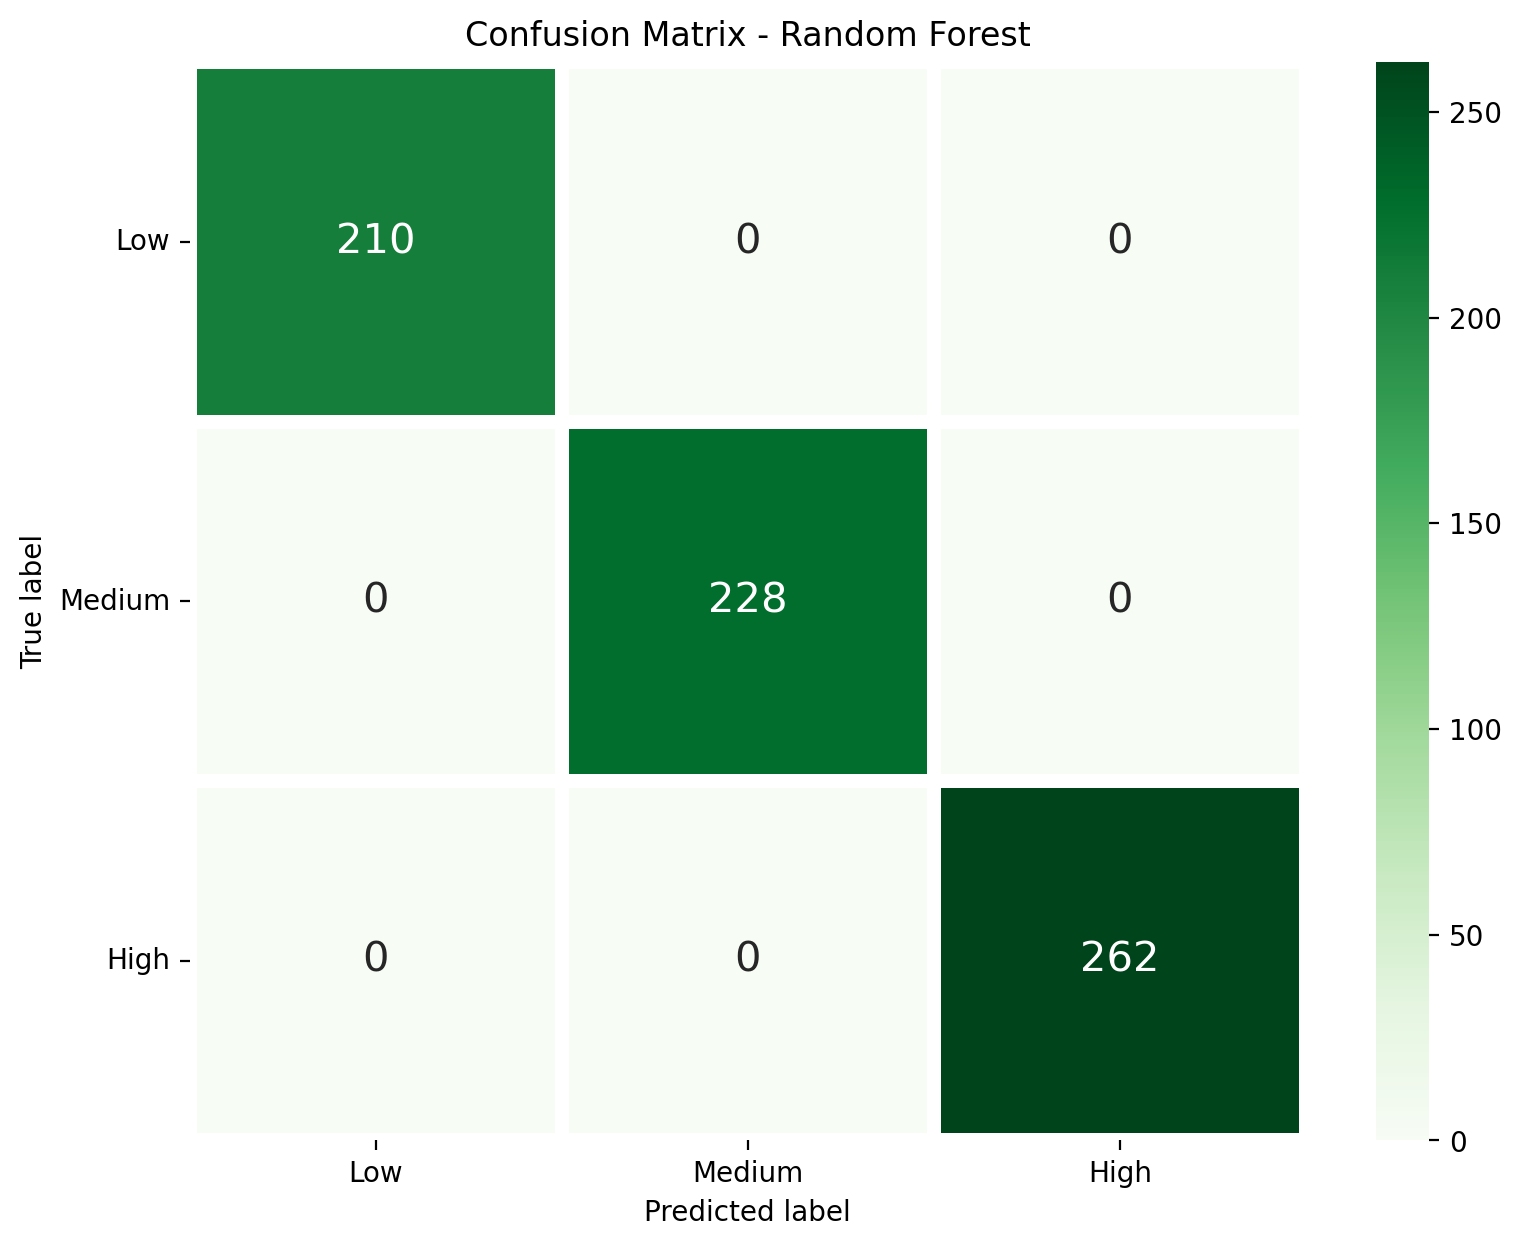

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       262

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [48]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Greens')
print(classification_report(y_test, RF_pred))

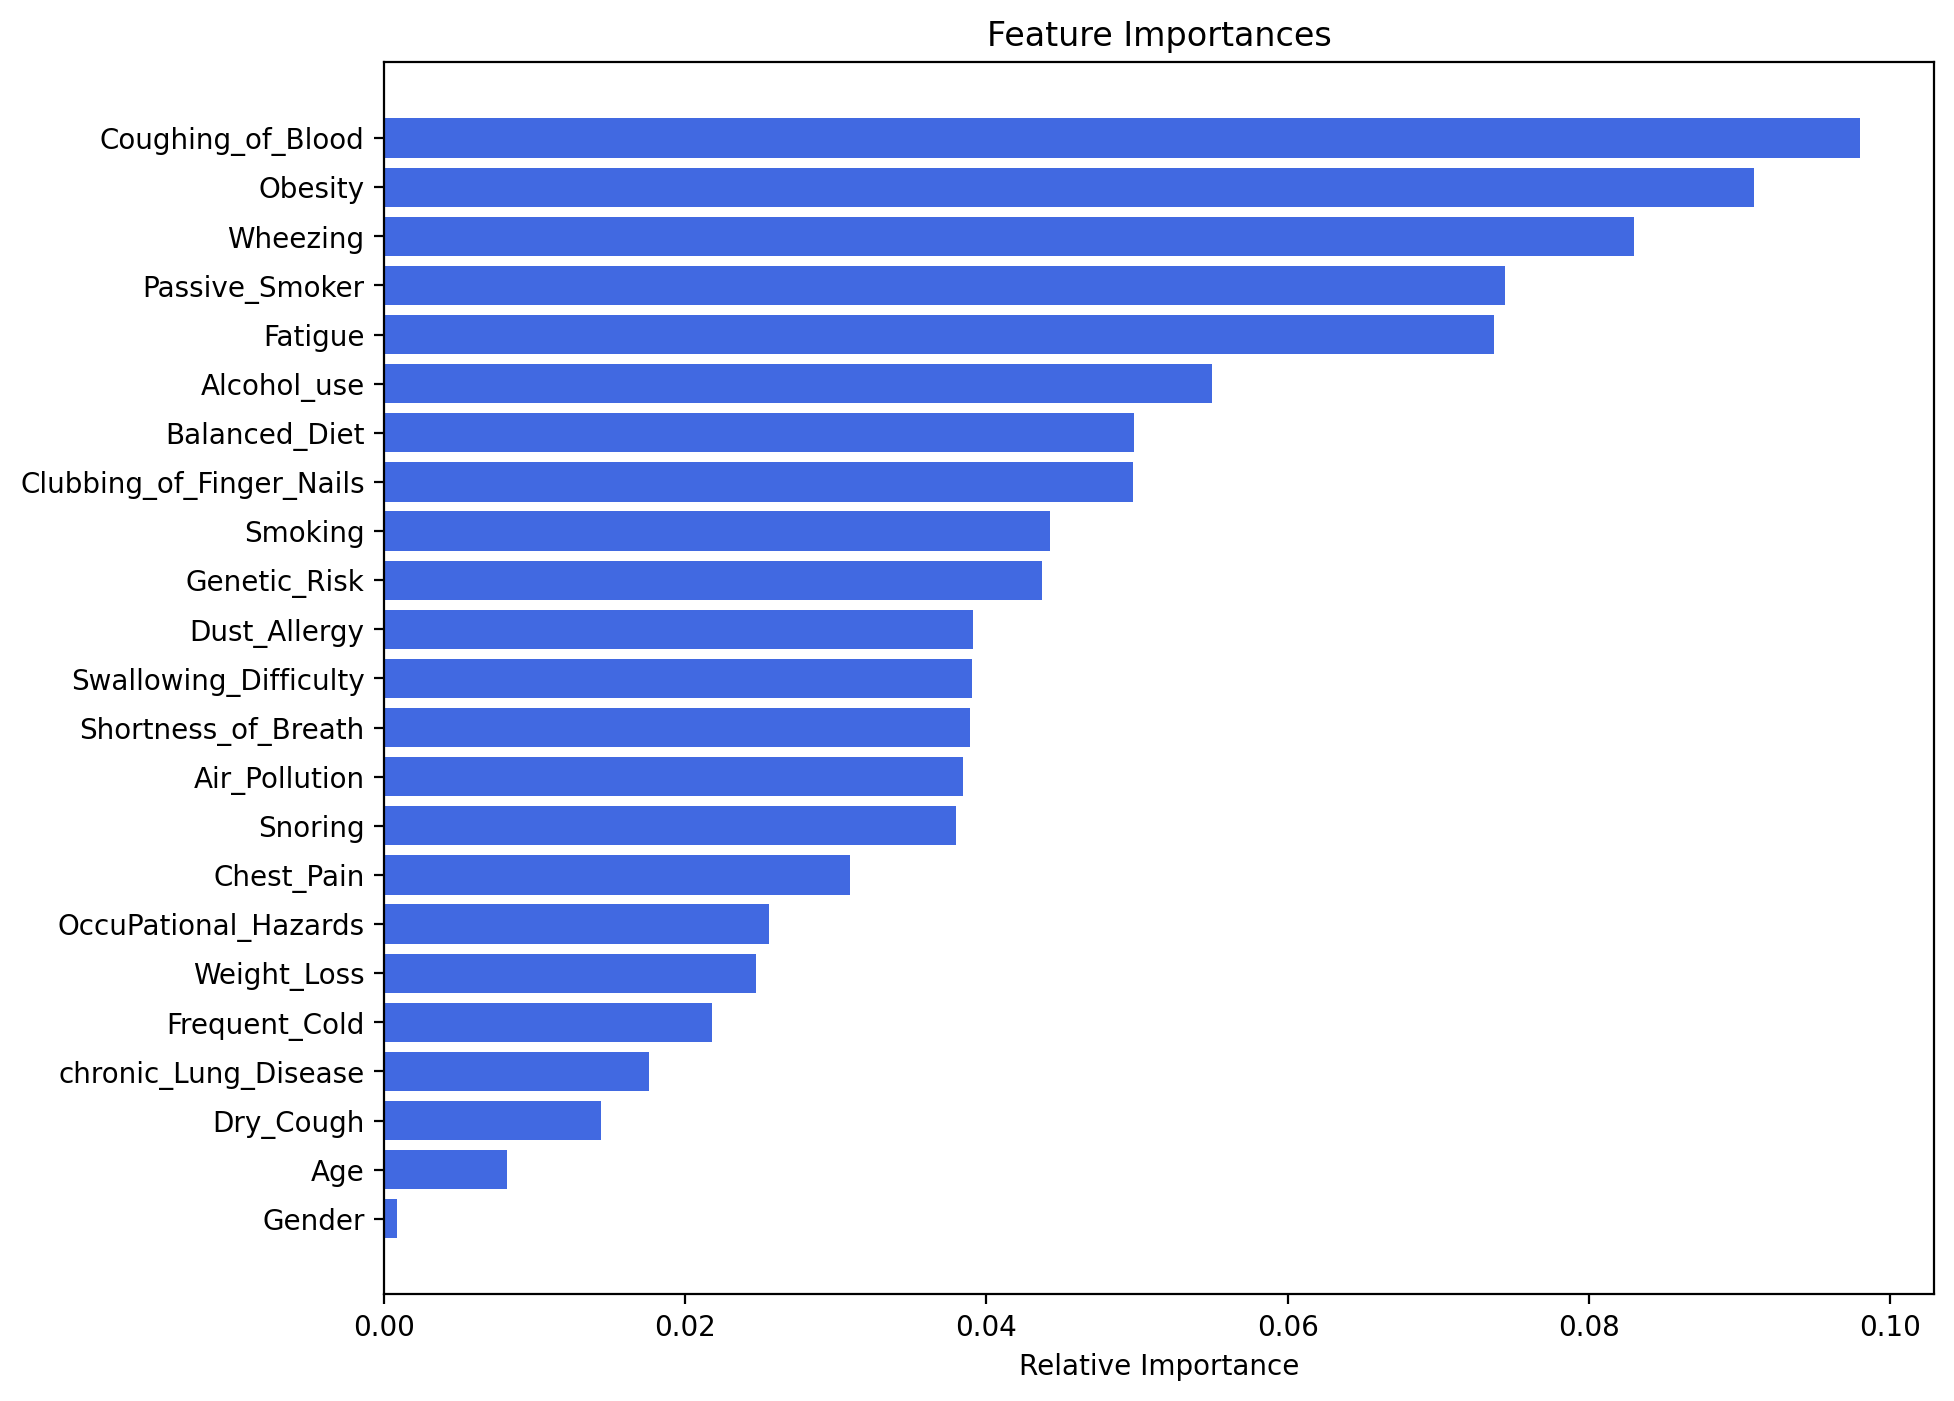

In [79]:
# Random Forest Feature Importance Plot
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizing feature importance
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#4169E1', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Display the most important features on top
save_path = os.path.join(plot_save, "RF_FI.png")
plt.savefig(save_path)
plt.show()

In [116]:
from sklearn import tree

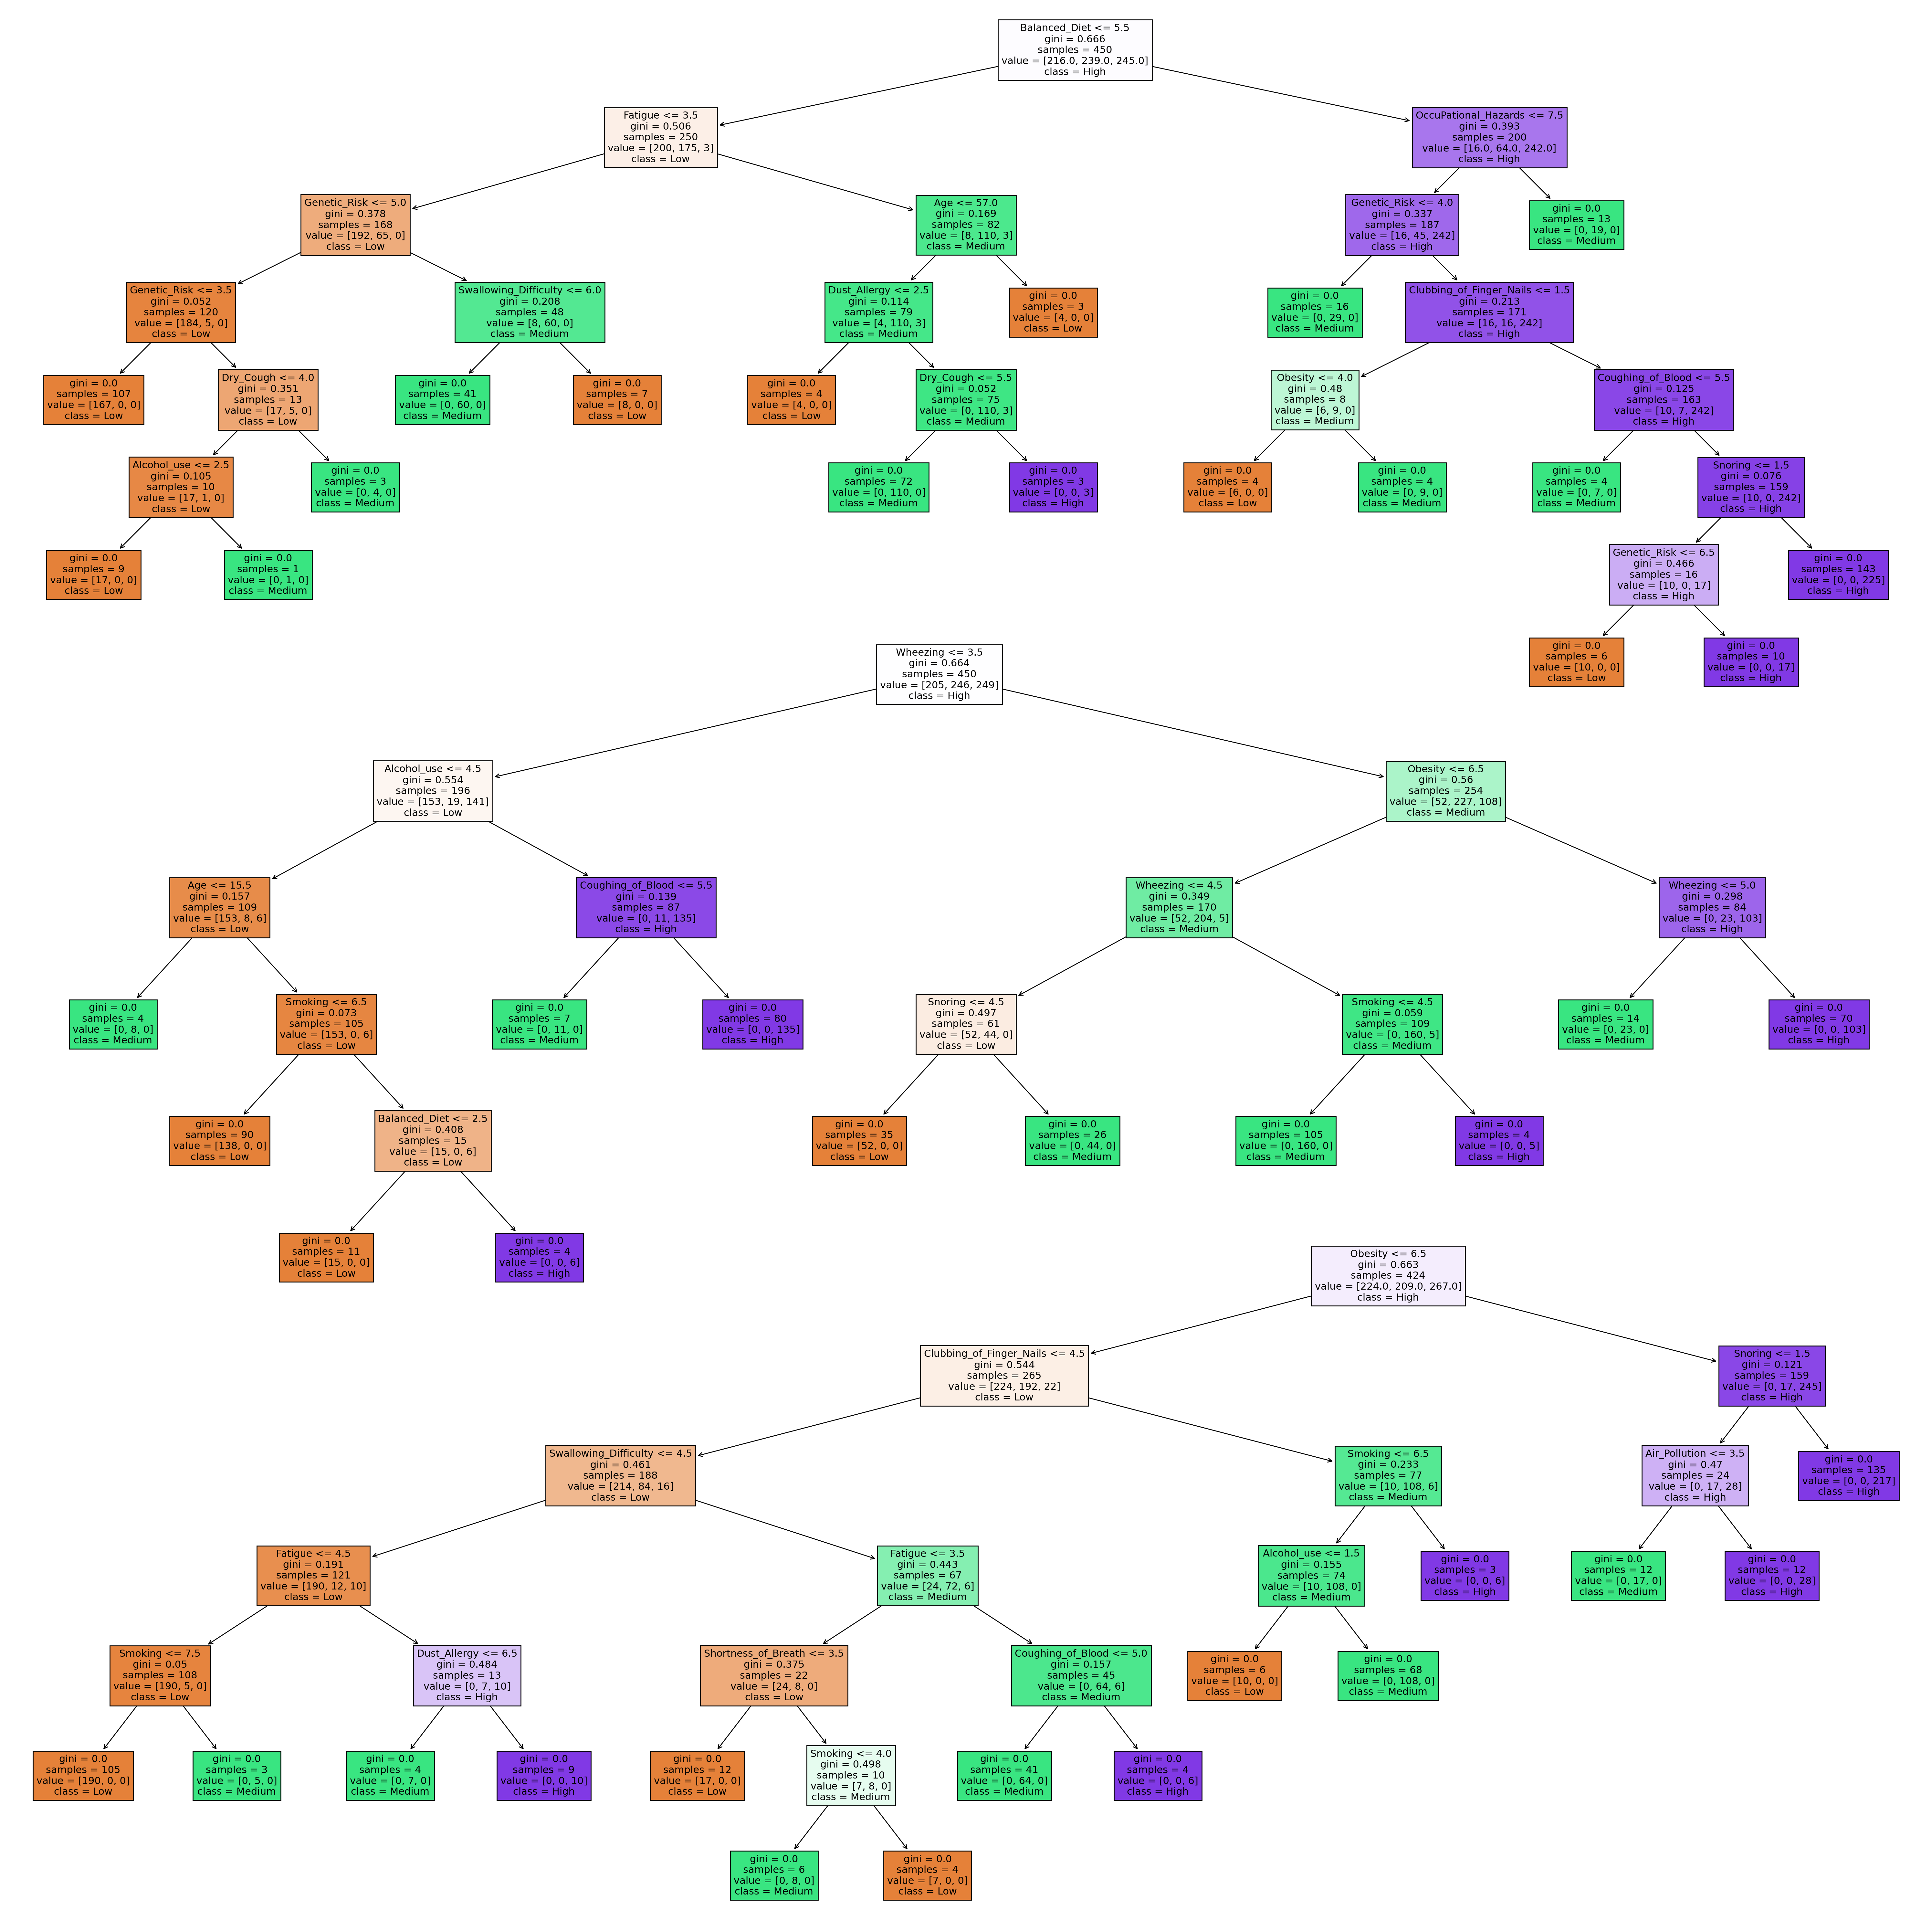

In [118]:
trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)
    
plt.tight_layout(h_pad=-10)
save_path = os.path.join(plot_save, "RF_trees.png")
plt.savefig(save_path)
plt.show()

In [81]:
# Calculate CI of RF
y_proba = RF.predict_proba(X_test)
n_samples = len(X_test)
std_error = np.sqrt((y_proba * (1 - y_proba)) / n_samples)
ci_lower = y_proba - 1.96 * std_error
ci_upper = y_proba + 1.96 * std_error

results = pd.DataFrame({
    'Class 0 Probability': y_proba[:, 0],
    'Class 0 CI Lower': ci_lower[:, 0],
    'Class 0 CI Upper': ci_upper[:, 0],
    'Class 1 Probability': y_proba[:, 1],
    'Class 1 CI Lower': ci_lower[:, 1],
    'Class 1 CI Upper': ci_upper[:, 1],
    'Class 2 Probability': y_proba[:, 2],
    'Class 2 CI Lower': ci_lower[:, 2],
    'Class 2 CI Upper': ci_upper[:, 2],
})
print(results)

     Class 0 Probability  Class 0 CI Lower  Class 0 CI Upper  \
0                    0.0               0.0               0.0   
1                    0.0               0.0               0.0   
2                    1.0               1.0               1.0   
3                    1.0               1.0               1.0   
4                    1.0               1.0               1.0   
..                   ...               ...               ...   
295                  0.0               0.0               0.0   
296                  0.0               0.0               0.0   
297                  0.0               0.0               0.0   
298                  0.0               0.0               0.0   
299                  1.0               1.0               1.0   

     Class 1 Probability  Class 1 CI Lower  Class 1 CI Upper  \
0                    0.0               0.0               0.0   
1                    1.0               1.0               1.0   
2                    0.0               

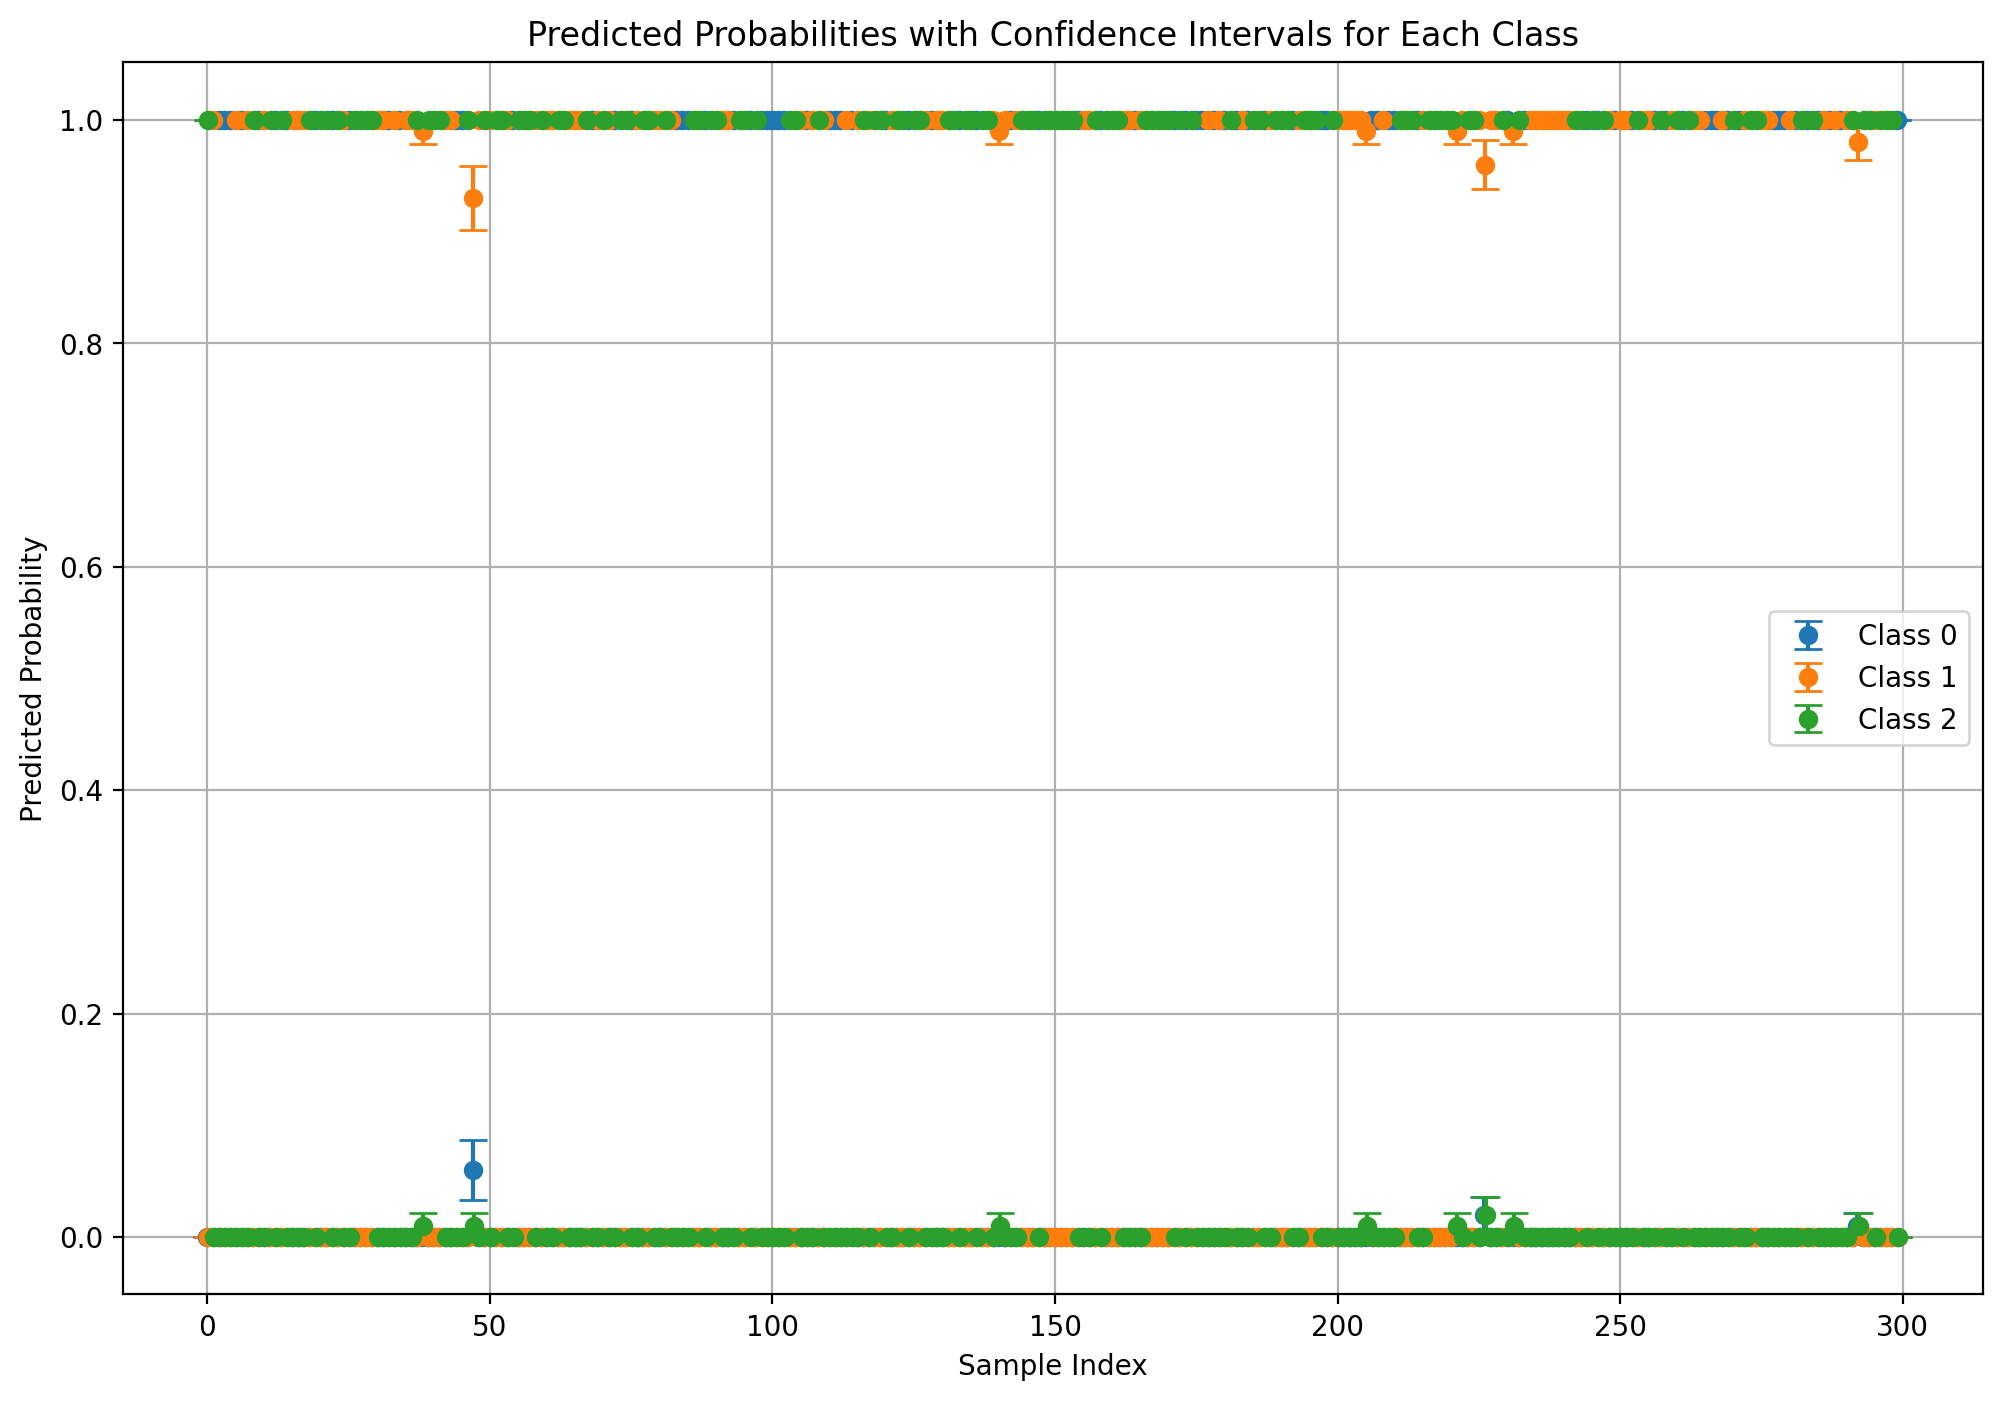

In [83]:
plt.figure(figsize=(12, 8))

# Plot the probability and confidence interval for each class
for i in range(3):  # 3 classes
    plt.errorbar(results.index + 0.1 * i,  
                 results[f'Class {i} Probability'],
                 yerr=[results[f'Class {i} Probability'] - results[f'Class {i} CI Lower'],
                       results[f'Class {i} CI Upper'] - results[f'Class {i} Probability']],
                 fmt='o', label=f'Class {i}', capsize=5)

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities with Confidence Intervals for Each Class')
plt.legend()
plt.grid(True)
save_path = os.path.join(plot_save, "RF_CI.png")
plt.savefig(save_path)
plt.show()

In [38]:
# Gaussian Naive Bayes

In [136]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)

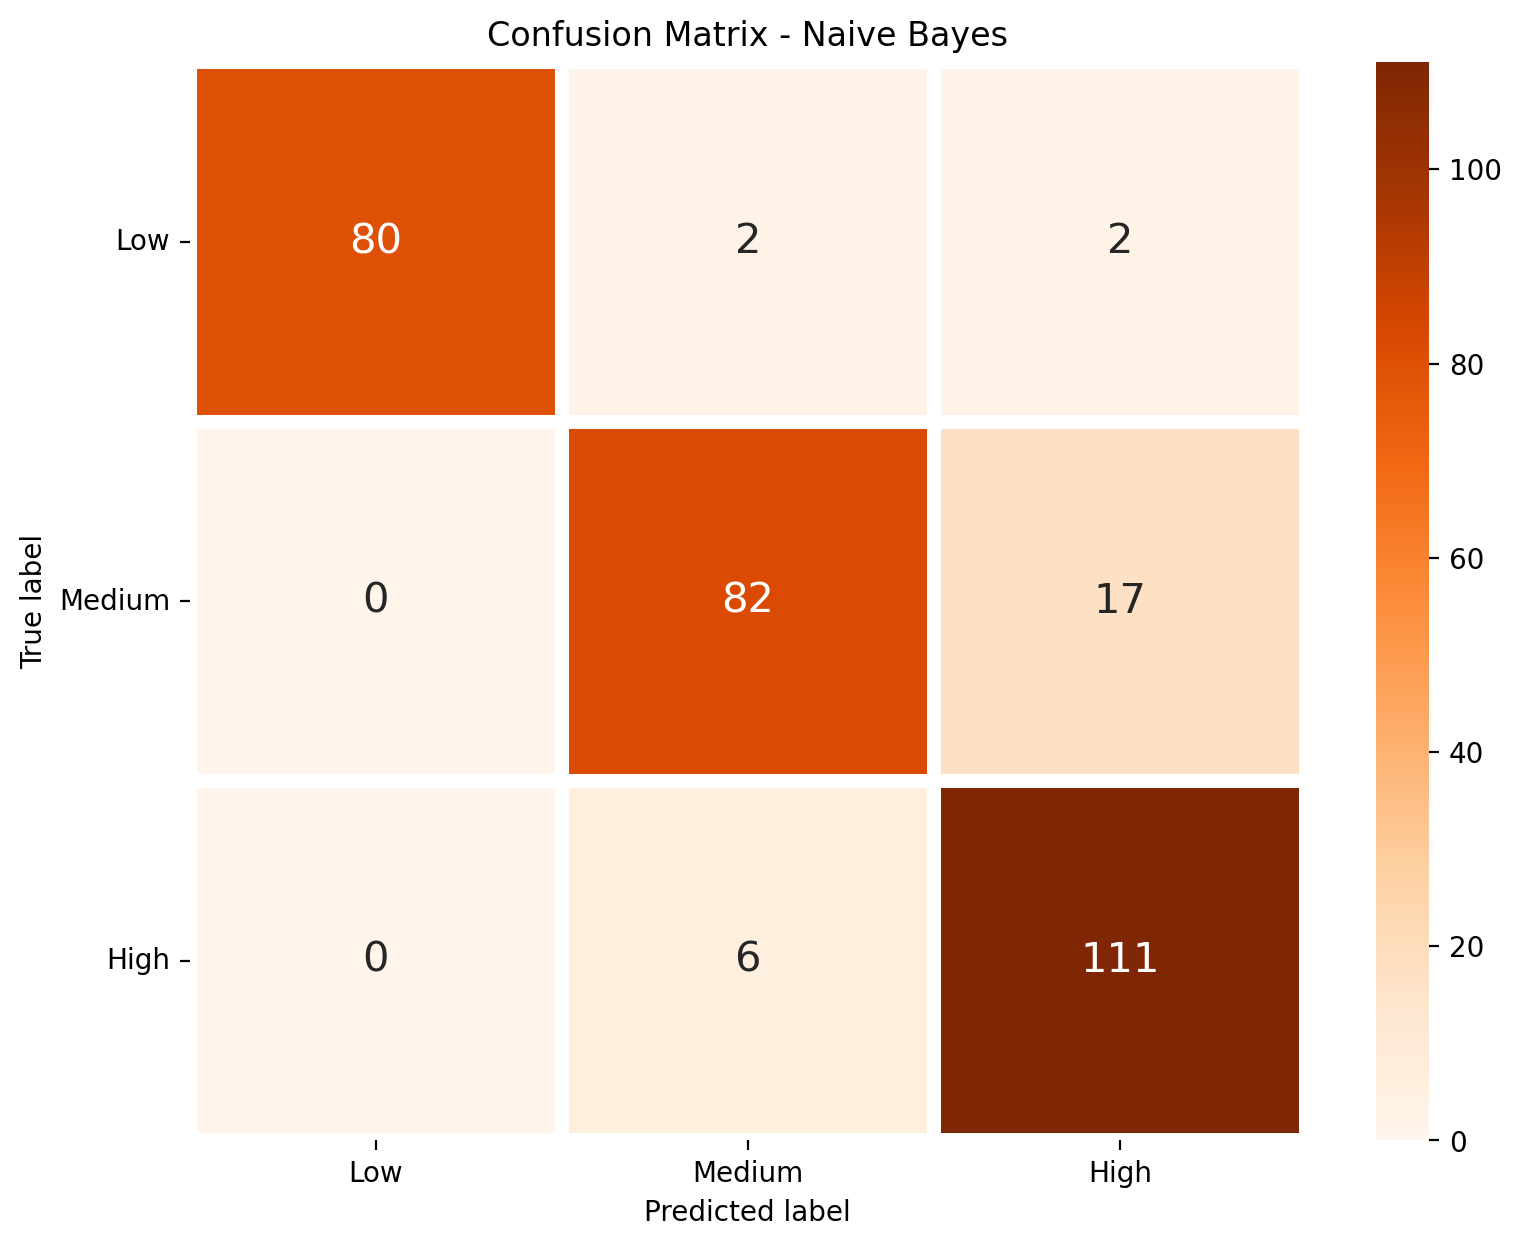

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [138]:
CM(y_test, GNB_pred, col_names=['Low', 'Medium', 'High'], title='- Naive Bayes', cmap='Oranges')

# View the classification report for test data and predictions
print(classification_report(y_test, GNB_pred))

In [140]:
GNB_proba = GNB.predict_proba(X_test)
n_samples = len(X_test)
std_error = np.sqrt((GNB_proba * (1 - GNB_proba)) / n_samples)
ci_lower = GNB_proba - 1.96 * std_error
ci_upper = GNB_proba + 1.96 * std_error

results = pd.DataFrame({
    'Class 0 Probability': GNB_proba[:, 0],
    'Class 0 CI Lower': ci_lower[:, 0],
    'Class 0 CI Upper': ci_upper[:, 0],
    'Class 1 Probability': GNB_proba[:, 1],
    'Class 1 CI Lower': ci_lower[:, 1],
    'Class 1 CI Upper': ci_upper[:, 1],
    'Class 2 Probability': GNB_proba[:, 2],
    'Class 2 CI Lower': ci_lower[:, 2],
    'Class 2 CI Upper': ci_upper[:, 2],
})
print(results)

     Class 0 Probability  Class 0 CI Lower  Class 0 CI Upper  \
0           1.072294e-23     -3.705548e-13      3.705548e-13   
1           8.945773e-18     -3.384577e-10      3.384577e-10   
2           2.707608e-04     -1.591024e-03      2.132546e-03   
3           9.868539e-01      9.739648e-01      9.997429e-01   
4           9.977688e-01      9.924297e-01      1.003108e+00   
..                   ...               ...               ...   
295         4.632811e-05     -7.238793e-04      8.165355e-04   
296         8.091473e-23     -1.017910e-12      1.017910e-12   
297         1.072294e-23     -3.705548e-13      3.705548e-13   
298         1.133356e-29     -3.809594e-16      3.809594e-16   
299         9.999993e-01      9.999072e-01      1.000092e+00   

     Class 1 Probability  Class 1 CI Lower  Class 1 CI Upper  \
0           5.663059e-15     -8.515707e-09      8.515718e-09   
1           1.000000e+00      1.000000e+00      1.000000e+00   
2           9.997292e-01      9.978675e

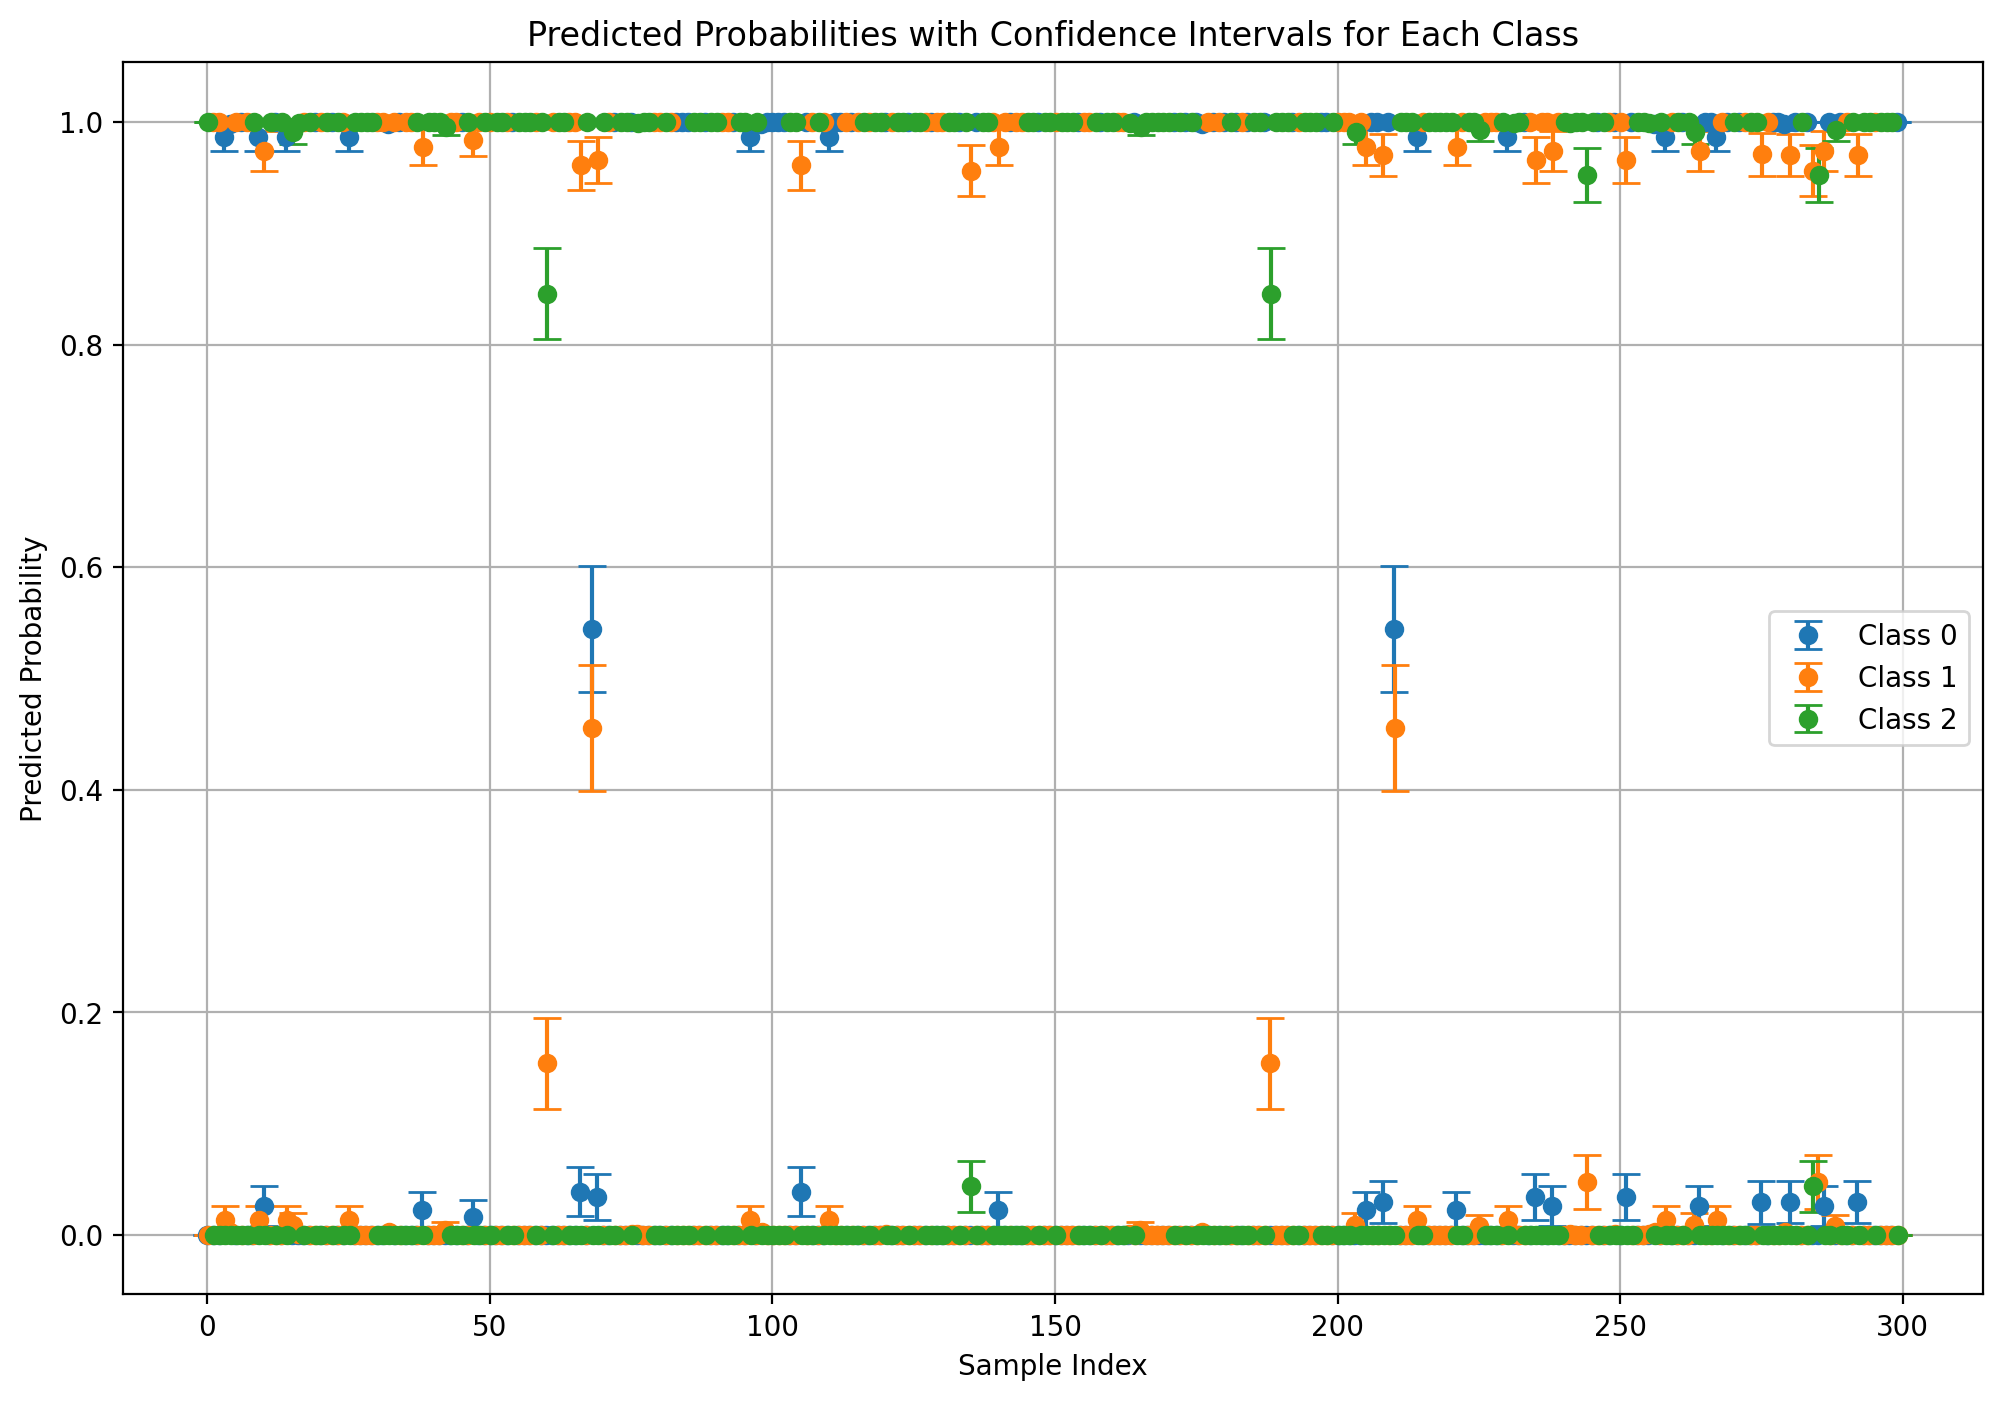

In [142]:
plt.figure(figsize=(12, 8))

# Plot the probability and confidence interval for each class
for i in range(3):  # 3 class
    plt.errorbar(results.index + 0.1 * i, 
                 results[f'Class {i} Probability'],
                 yerr=[results[f'Class {i} Probability'] - results[f'Class {i} CI Lower'],
                       results[f'Class {i} CI Upper'] - results[f'Class {i} Probability']],
                 fmt='o', label=f'Class {i}', capsize=5)

plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities with Confidence Intervals for Each Class')
plt.legend()
plt.grid(True)
save_path = os.path.join(plot_save, "GNB_CI.png")
plt.savefig(save_path)
plt.show()

In [ ]:
# Comparsion

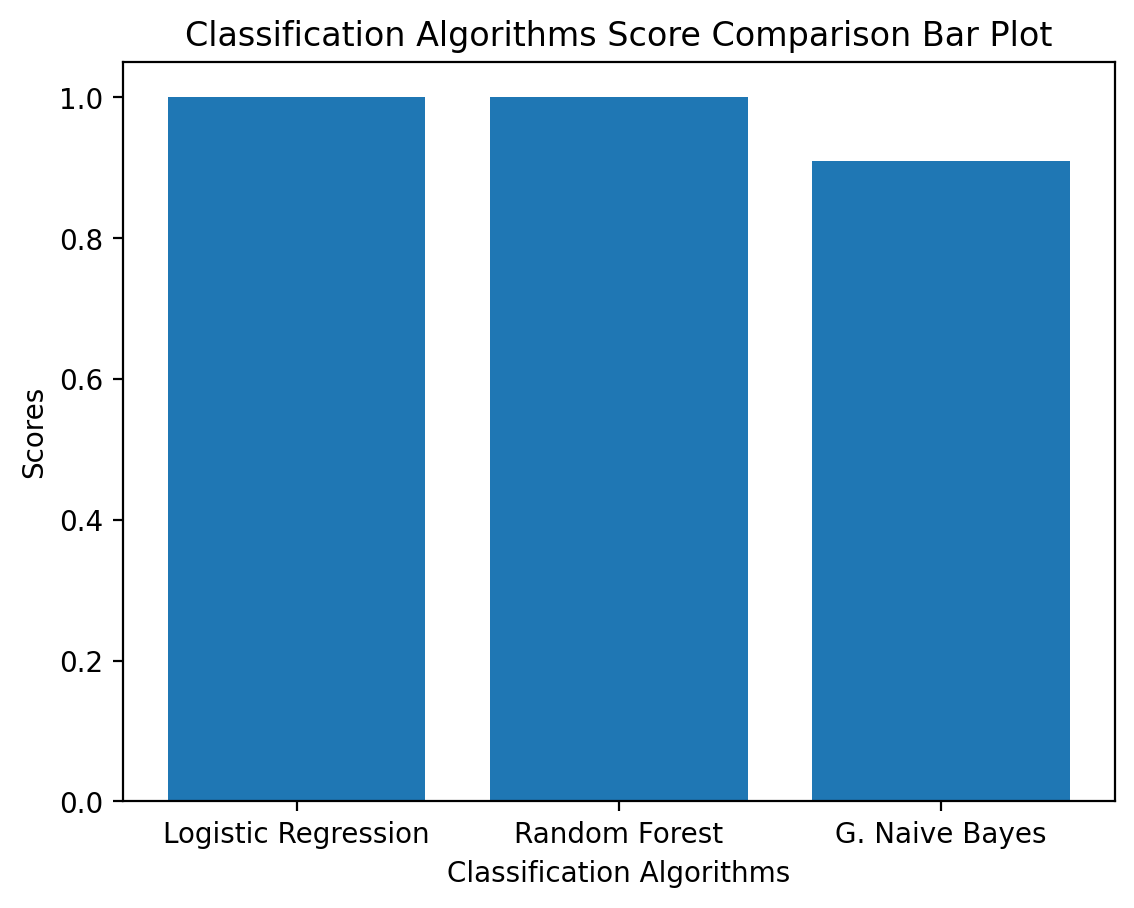

In [76]:
GNB_score = GNB.score(X_test, y_test)
MR_score = MR.score(X_test, y_test)
RF_score = RF.score(X_test, y_test)
x=['Logistic Regression', 'Random Forest','G. Naive Bayes']

y = [MR_score, RF_score, GNB_score]

plt.bar(x,y)
plt.xlabel('Classification Algorithms')
plt.ylabel("Scores")
plt.title('Classification Algorithms Score Comparison Bar Plot')
save_path = os.path.join(plot_save, "Score_Compariosn.png")
plt.savefig(save_path)
plt.show()

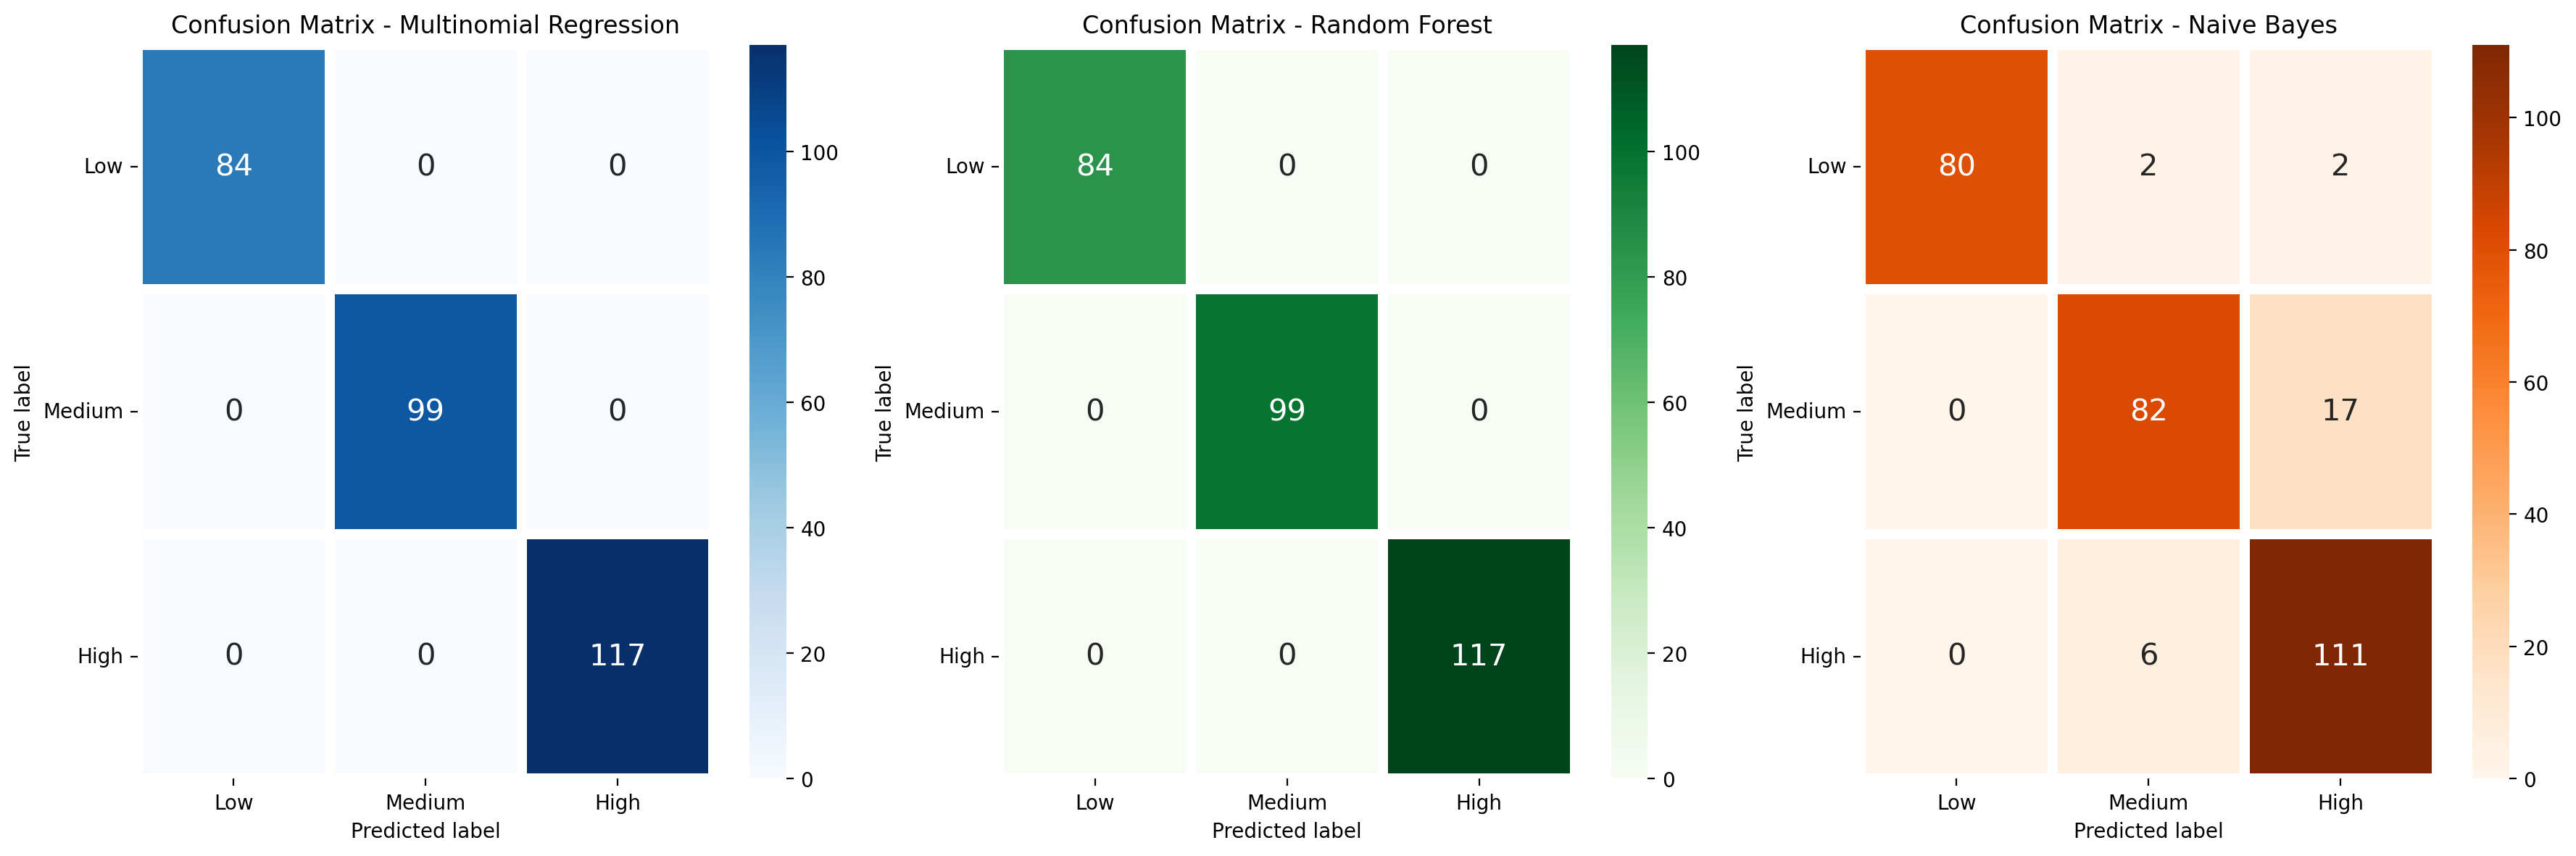

In [156]:
def CM(y_test, y_pred_test, col_names, ax, title='', cmap=plt.cm.Blues):
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt="d", cmap=cmap, linewidths=5, ax=ax)
    # labels in plot
    tick_marks = np.arange(len(col_names))
    ax.set_xticks(tick_marks + 0.5)
    ax.set_yticks(tick_marks + 0.5)
    ax.set_xticklabels(col_names)
    ax.set_yticklabels(col_names, rotation=0)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix ' + title)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# create subplot
CM(y_test, MR_pred, ['Low', 'Medium', 'High'], axes[0], title='- Multinomial Regression', cmap='Blues')
CM(y_test, RF_pred, ['Low', 'Medium', 'High'], axes[1], title='- Random Forest', cmap='Greens')
CM(y_test, GNB_pred, ['Low', 'Medium', 'High'], axes[2], title='- Naive Bayes', cmap='Oranges')

plt.tight_layout()
save_path = os.path.join(plot_save, "CM_Compariosn.png")
plt.savefig(save_path)
plt.show()